In [1]:
import joblib 
import os
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


if 'src' in os.getcwd() or 'results' in os.getcwd():
    os.chdir('..')
    print(os.getcwd())
if 'src' not in os.getcwd():
    os.chdir('src')

from experiments_helpers import ExperimentResults

if 'src' in os.getcwd() or 'results' in os.getcwd():
    os.chdir('..')
    print(os.getcwd())


THRESHS = [60, 65, 70, 75, 80, 90, 95, 99]

folder = 'results_big_benchmark_march6/results'
DATASET = 'wine_quality'
BASE_METHOD = 'dice'
ROBUST_METHOD = 'statrob'
EXPERIMENT = 'SameSampleExperimentData' #'TwoSamplesOneDatasetExperimentData'
ENSEMBLE = 'mlp-torch'
# name = 'mlp-torch-fico-statrob-TwoSamplesOneDatasetExperimentData-gs-config_a060.yml_0'
name = f'{ENSEMBLE}-{DATASET}-{ROBUST_METHOD}-{EXPERIMENT}-{BASE_METHOD}-config_a090.yml_0'



es_base: ExperimentResults = ExperimentResults.load_results_from_file(f'{folder}/{name}.joblib')

es_base.pretty_print_robust_vs_base()

/home/ignacy/research/robust-cf
/home/ignacy/research/robust-cf/src


2024-03-13 12:08:07.643548: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-13 12:08:07.673774: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


/home/ignacy/research/robust-cf
ExperimentResults with 32 metrics and 0 artifacts.
############################## Metrics ##############################
------------------------- Base metrics -------------------------
validity: 1.00 (std: 0.00)
proximityL1: 0.74 (std: 0.43)
proximityL2: 0.60 (std: 0.30)
lof: -2.25 (std: 0.91)
cf_counterfactual_stability: 0.14 (std: 0.15)
dpow: 0.56 (std: 0.24)
plausibility: 0.47 (std: 0.24)
generation_time: 1.05 (std: 3.54)
------------------------- Base metrics 2 -------------------------
validity_2: 0.72 (std: 0.45)
proximityL1_2: 0.74 (std: 0.43)
proximityL2_2: 0.60 (std: 0.30)
lof_2: -2.25 (std: 0.91)
cf_counterfactual_stability_2: 0.24 (std: 0.20)
dpow_2: 0.58 (std: 0.23)
plausibility_2: 0.47 (std: 0.24)
------------------------- Robust metrics -------------------------
robust_validity: nan (std: nan)
robust_proximityL1: nan (std: nan)
robust_proximityL2: nan (std: nan)
robust_lof: nan (std: nan)
robust_cf_counterfactual_stability: nan (std: nan)


In [2]:
es_base.get_results_as_pandas()

,validity,proximityL1,proximityL2,lof,cf_counterfactual_stability,dpow,plausibility,validity_2,proximityL1_2,proximityL2_2,...,robust_validity_2,robust_proximityL1_2,robust_proximityL2_2,robust_lof_2,robust_cf_counterfactual_stability_2,robust_dpow_2,robust_plausibility_2,robust_generation_time,robust_cf_to_base_cf_proximity_L1,robust_cf_to_base_cf_proximity_L2
0,1,0.416316,0.416316,-2.011682,0.145813,0.733333,0.374959,1,0.416316,0.416316,...,1.0,0.830865,0.430481,-1.915720,0.374135,0.733333,0.337069,2.236120,0.460513,0.176439
1,1,0.382187,0.382187,-2.054409,-0.000581,0.200000,0.410944,0,0.382187,0.382187,...,1.0,1.008052,0.377704,-1.891780,0.184126,0.333333,0.348116,1.464509,0.830461,0.273473
2,1,0.498104,0.498104,-1.757099,0.306902,0.400000,0.305769,1,0.498104,0.498104,...,1.0,0.515308,0.498812,-1.763532,0.044176,0.400000,0.305934,0.109647,0.017203,0.006315
3,1,1.772629,1.256672,-4.638306,0.001959,0.266667,1.165101,1,1.772629,1.256672,...,1.0,2.802218,1.258211,-5.212246,0.645923,0.600000,1.103381,2.085976,1.305913,0.492354
4,1,1.361414,0.963194,-3.838182,0.505072,0.733333,0.803946,1,1.361414,0.963194,...,1.0,1.361414,0.963194,-3.838182,0.806819,0.733333,0.803946,0.019598,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,1,1.020219,0.733262,-2.057515,0.108371,0.866667,0.404183,1,1.020219,0.733262,...,1.0,1.020219,0.733262,-2.057515,0.387244,0.866667,0.404183,0.614704,0.000000,0.000000
971,1,0.750594,0.585124,-1.736519,0.187259,0.733333,0.259854,1,0.750594,0.585124,...,1.0,0.750594,0.585124,-1.736519,0.302305,0.733333,0.259854,0.565036,0.000000,0.000000
972,1,1.368601,0.976499,-4.386489,0.014298,0.666667,0.936558,1,1.368601,0.976499,...,1.0,2.088628,1.036361,-4.930350,0.319181,0.800000,0.986437,1.921399,0.720027,0.255746
973,1,0.541629,0.541629,-2.535573,-0.027008,0.600000,0.538472,1,0.541629,0.541629,...,1.0,0.972076,0.548057,-2.569749,0.388972,0.733333,0.531789,3.305167,0.474004,0.174917


In [3]:
res = es_base.get_results_as_pandas()
res = res.dropna() #TODO investigate what causes nulls 
res = res[res['robust_validity'] > 0] #TODO fix so robust cf is always valid for model 1
cols = [x for x in res.columns if 'prox' in x]
res[cols].mean()

proximityL1                          0.736401
proximityL2                          0.592967
proximityL1_2                        0.736401
proximityL2_2                        0.592967
robust_proximityL1                   1.047103
robust_proximityL2                   0.610694
robust_proximityL1_2                 1.047103
robust_proximityL2_2                 0.610694
robust_cf_to_base_cf_proximity_L1    0.386236
robust_cf_to_base_cf_proximity_L2    0.142362
dtype: float64

In [4]:
def read_results(dataset: str, 
                 robust_method: str, 
                 experiment: str, 
                 base_method: str, 
                 ensemble: str, 
                 threshs: list[int] = THRESHS,
                 folder: str = 'results_big_benchmark_march6/results',
                 combine: bool = True
    ) -> dict[int, ExperimentResults]:
    '''
    Read results from the folder and return a dictionary with the threshold as key and the ExperimentResults as value
    '''
    name = f'{ensemble}-{dataset}-{robust_method}-{experiment}-{base_method}-config_a0'
    
    all_filenames = os.listdir(folder)
    all_with_name = [f for f in all_filenames if name in f]
    
    experiment_results = {}
    counters = []
    for i, a in enumerate(threshs):
        # filename = f'{folder}/{name}{a}.yml_0.joblib'
        filename_core = f'{name}{a}'
        files_mathcing = [f for f in all_with_name if filename_core == f.split('.')[0]]
        
        combined: ExperimentResults = None
        counter = 0
        
        for f in files_mathcing:
            er = ExperimentResults.load_results_from_file(f'{folder}/{f}')
            
            if er is None or er.results is None:
                print(f'Could not read {f}')
                continue
            
            if combined is None:
                combined = er
                counter += 1
            else:
                combined.add_experiment_results(er)
                counter += 1
                
        counters.append(counter)
        experiment_results[a] = combined
    
    p = [f'{t}:{c}' for t, c in zip(threshs, counters)]
    print(f'Combined (thresh:how many): {p}')
    return experiment_results

In [5]:
read_results('breast_cancer', 'statrob', 'TwoSamplesOneDatasetExperimentData', 'dice', 'mlp-torch')

Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']


{60: ExperimentResults with 32 metrics and 0 artifacts.,
 65: ExperimentResults with 32 metrics and 0 artifacts.,
 70: ExperimentResults with 32 metrics and 0 artifacts.,
 75: ExperimentResults with 32 metrics and 0 artifacts.,
 80: ExperimentResults with 32 metrics and 0 artifacts.,
 90: ExperimentResults with 32 metrics and 0 artifacts.,
 95: ExperimentResults with 32 metrics and 0 artifacts.,
 99: ExperimentResults with 32 metrics and 0 artifacts.}

<div style="background-color: #880000; color: #FFFFFF; font-weight: bold; padding: 10px; margin: 10px 0 20px 0; text-align: center; border-radius: 10px;">Empirical validity on the changed model vs the selected alpha threshold </div>

Saving to results_big_benchmark_march6/plots/empirical_vs_alpha
Starting to plot...
======================================== Experiment type: SameSampleExperimentData ========================================
Plotting with base method gs and saving to results_big_benchmark_march6/plots/empirical_vs_alpha/empirical_vs_alpha_gs_SameSampleExperimentData.png
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
x_minval: 0.44816807219176974


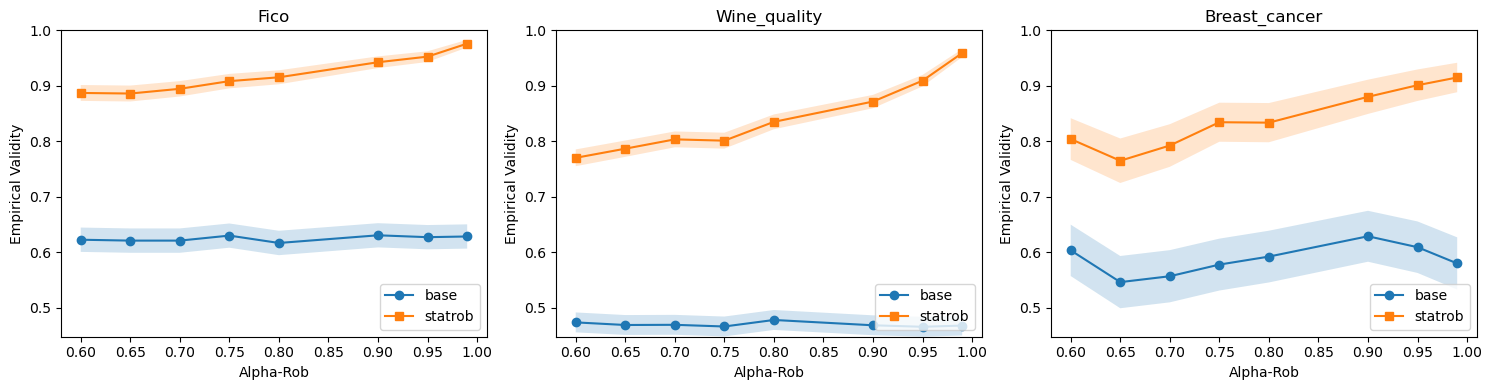

Plotting with base method dice and saving to results_big_benchmark_march6/plots/empirical_vs_alpha/empirical_vs_alpha_dice_SameSampleExperimentData.png
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
x_minval: 0.6851290545545204


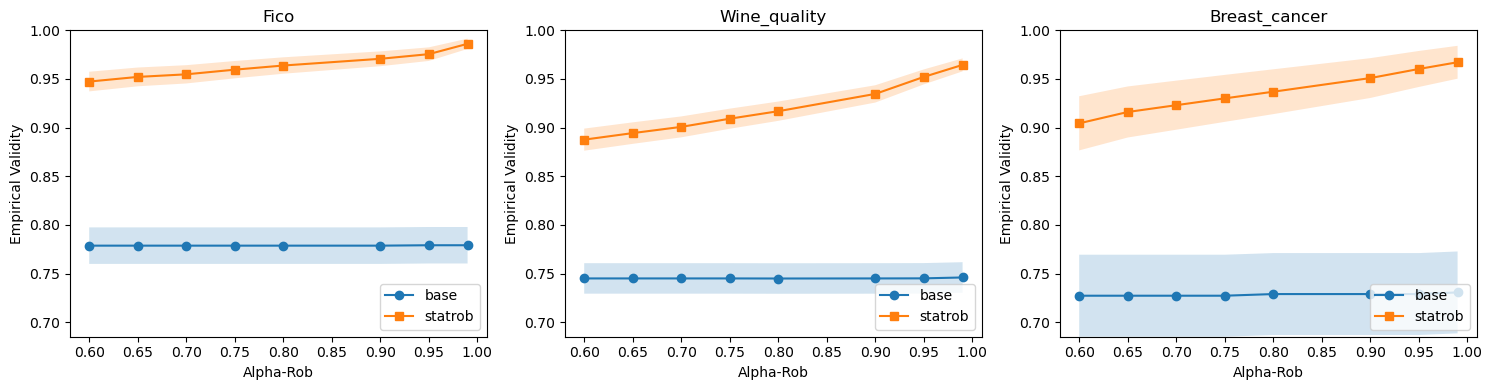

======================================== Experiment type: TwoSamplesOneDatasetExperimentData ========================================
Plotting with base method gs and saving to results_big_benchmark_march6/plots/empirical_vs_alpha/empirical_vs_alpha_gs_TwoSamplesOneDatasetExperimentData.png
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
x_minval: 0.2533733814644752


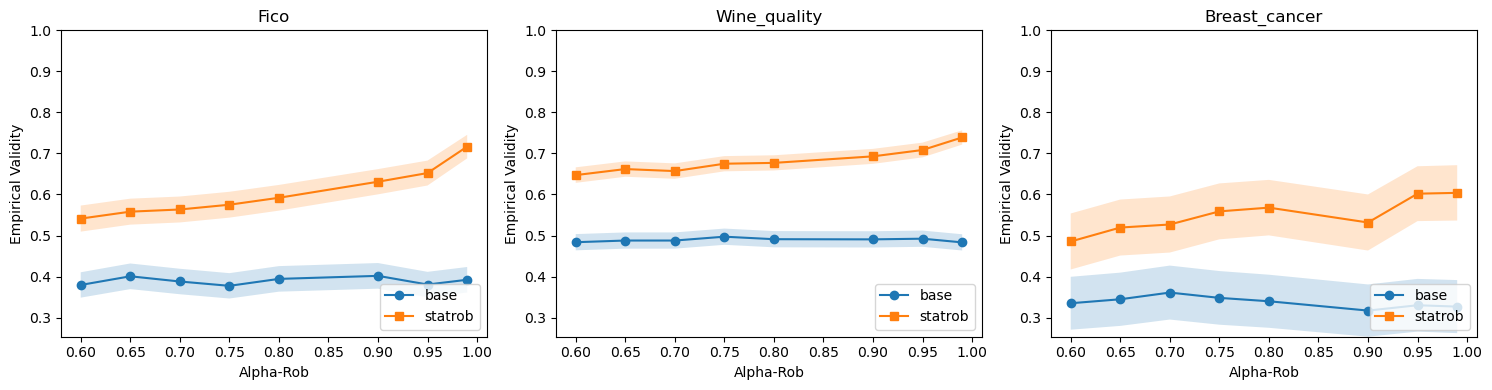

Plotting with base method dice and saving to results_big_benchmark_march6/plots/empirical_vs_alpha/empirical_vs_alpha_dice_TwoSamplesOneDatasetExperimentData.png
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
x_minval: 0.36916064085538847


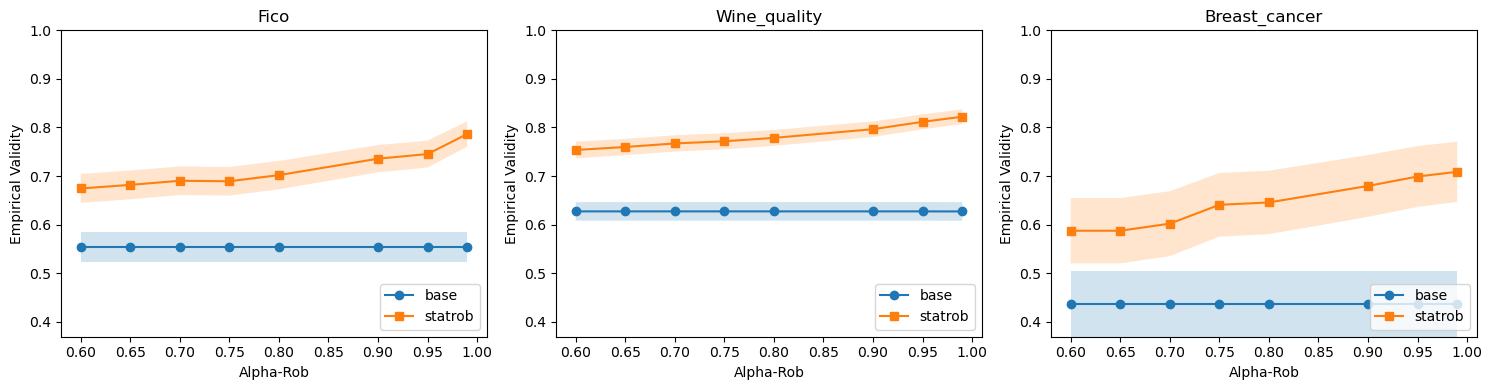

Done!


In [6]:

    

def plot_empirob_vs_alpha(datasets: list = ['fico', 'wine_quality', 'breast_cancer'], 
        base_method: str = 'gs',
        robust_method: str = 'statrob',
        experiment: str = 'SameSampleExperimentData',
        ensemble: str = 'mlp-torch',
        threshs: list[int] = THRESHS,
        CI_level: float = 0.95,
        save_filename: str = None
    ) -> None:
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    
    x_minval = 1
    
    for dataset, ax in zip(datasets, axs):
        results = read_results(dataset, robust_method, experiment, base_method, ensemble)
    
        measurements = []
        cols_validity = None
    
        for exres in results.values():
            res = exres.get_results_as_pandas()
            res = res.dropna()
            cols_validity = [x for x in res.columns if 'validity' in x and '_2' in x]
            measurements.append(res[cols_validity].to_numpy())
        
        means = np.array([np.mean(m, axis=0) for m in measurements])
        stds = np.array([np.std(m, axis=0) for m in measurements])
        
        z = np.abs(stats.norm.ppf((1-CI_level)/2))
        
        conf_interv = np.array([z * np.sqrt((p*(1-p))/len(m)) for m, p in zip(measurements, means)])
        alphas = [float(f'0.{t}') for t in threshs]
        
        x_minval = min(x_minval, np.min(means - conf_interv))
        
    
        map_names = {
            'validity_2': 'base',
            'robust_validity_2': 'statrob'
        }
    
        markers = ['o', 's']
        for i, col in enumerate(cols_validity):
            # ax.errorbar(alphas, [m[i] for m in means], yerr=[c[i] for c in conf_interv], label=map_names[col], fmt=f'-{markers[i]}')
            ax.plot(alphas, [m[i] for m in means], label=map_names[col], marker=markers[i])
            ax.fill_between(alphas, [m[i] - c[i] for m, c in zip(means, conf_interv)], [m[i] + c[i] for m, c in zip(means, conf_interv)], alpha=0.2)
            
            
        ax.set_xlabel('Alpha-Rob')
        ax.set_ylabel('Empirical Validity')
        ax.set_title(f'{dataset.capitalize()}')
        ax.legend(loc='lower right')
        
    
    print('x_minval:', x_minval)
    # set limits
    for ax in axs:
        ax.set_ylim(x_minval, 1)
        # ax.grid(True)
    
    # plt.suptitle(f'Empirical validity for the changed model vs alpha-Robustness ({int(CI_level*100)}% confidence intervals)')
    plt.tight_layout()
    
    if save_filename:
        os.makedirs(os.path.dirname(save_filename), exist_ok=True)
        plt.savefig(save_filename, dpi=300, bbox_inches='tight')
    
    plt.show()
    


SAVE_DIR = 'results_big_benchmark_march6/plots/empirical_vs_alpha'
print('Saving to', SAVE_DIR)
print('Starting to plot...')
for experiment_type in ['SameSampleExperimentData', 'TwoSamplesOneDatasetExperimentData']:
    print('='*40 + f' Experiment type: {experiment_type} ' + '='*40)
    for base_method in ['gs', 'dice']:
        save_filepath = f'{SAVE_DIR}/empirical_vs_alpha_{base_method}_{experiment_type}.png'
        print(f'Plotting with base method {base_method} and saving to {save_filepath}')
        plot_empirob_vs_alpha(base_method=base_method, experiment=experiment_type, save_filename=save_filepath)

print('Done!')

<div style="background-color: #880000; color: #FFFFFF; font-weight: bold; padding: 10px; margin: 10px 0 20px 0; text-align: center; border-radius: 10px;">Selected alpha vs actual lowest alpha for the returned counterfactual </div>

Saving to results_big_benchmark_march6/plots/alpha_vs_lowest_alpha
Starting to plot...
======================================== Experiment type: SameSampleExperimentData ========================================
Plotting with base method gs and saving to results_big_benchmark_march6/plots/alpha_vs_lowest_alpha/alpha_vs_lowest_alpha_gs_SameSampleExperimentData.png
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
x_minval: 0.5


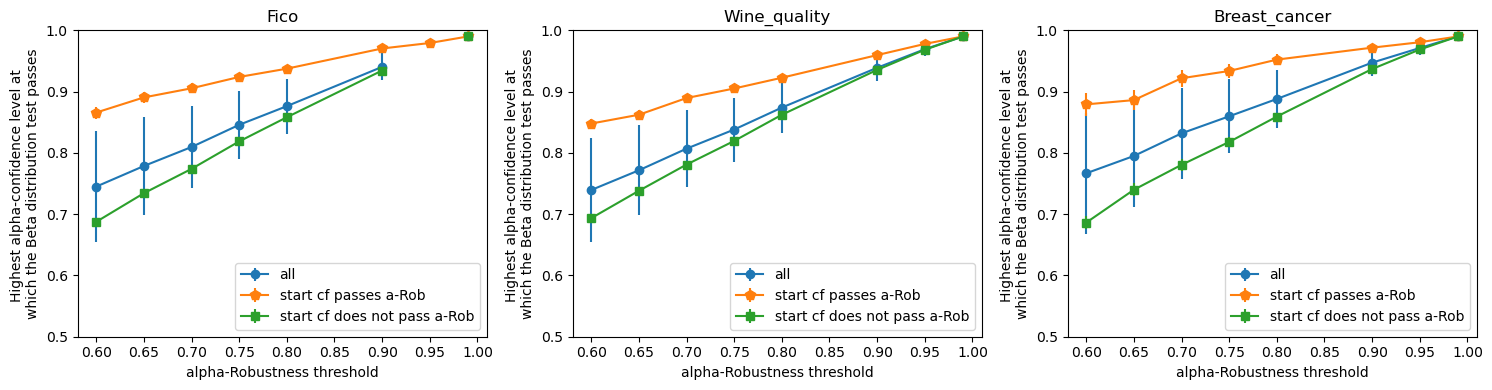

Plotting with base method dice and saving to results_big_benchmark_march6/plots/alpha_vs_lowest_alpha/alpha_vs_lowest_alpha_dice_SameSampleExperimentData.png
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
x_minval: 0.5


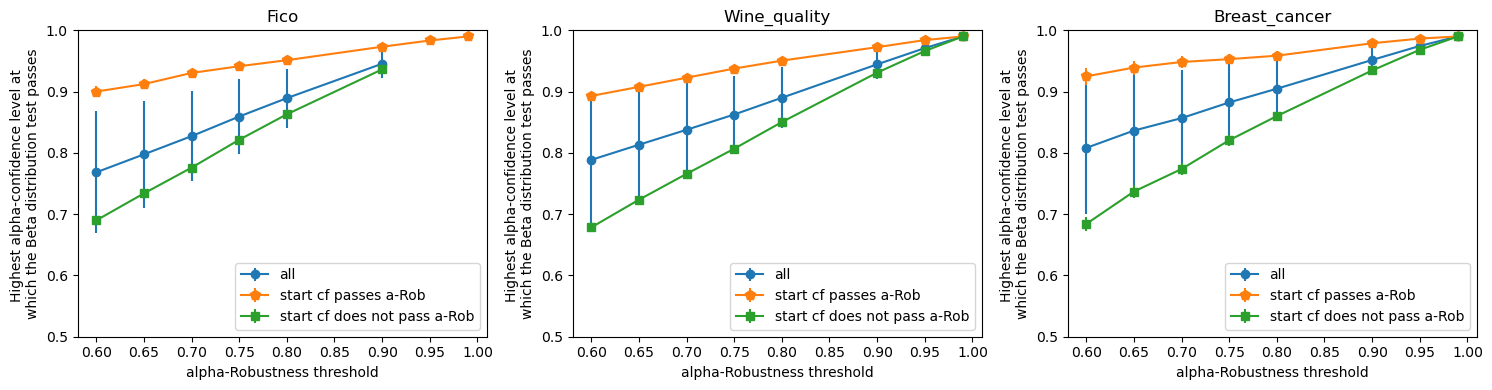

======================================== Experiment type: TwoSamplesOneDatasetExperimentData ========================================
Plotting with base method gs and saving to results_big_benchmark_march6/plots/alpha_vs_lowest_alpha/alpha_vs_lowest_alpha_gs_TwoSamplesOneDatasetExperimentData.png
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
x_minval: 0.5


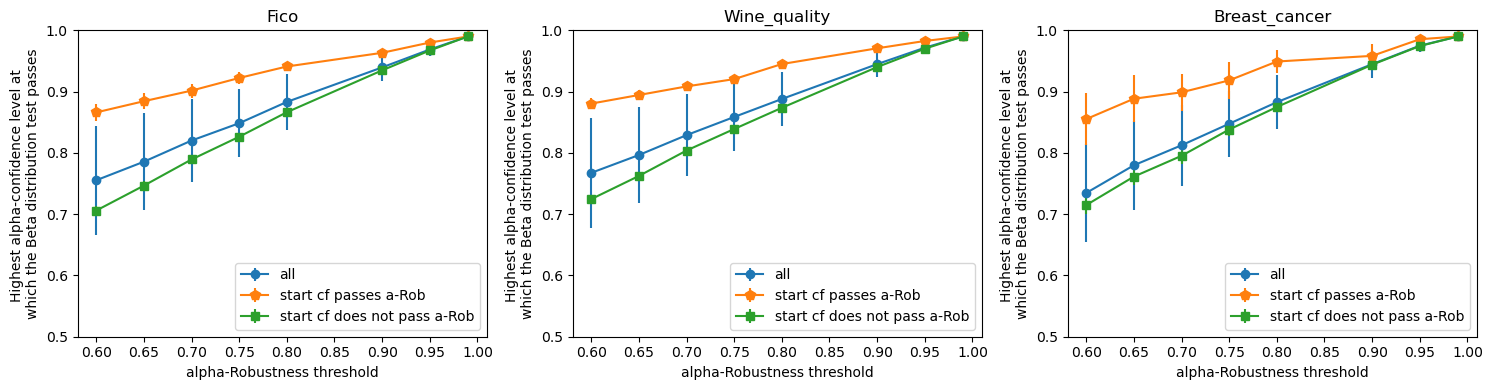

Plotting with base method dice and saving to results_big_benchmark_march6/plots/alpha_vs_lowest_alpha/alpha_vs_lowest_alpha_dice_TwoSamplesOneDatasetExperimentData.png
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
x_minval: 0.5


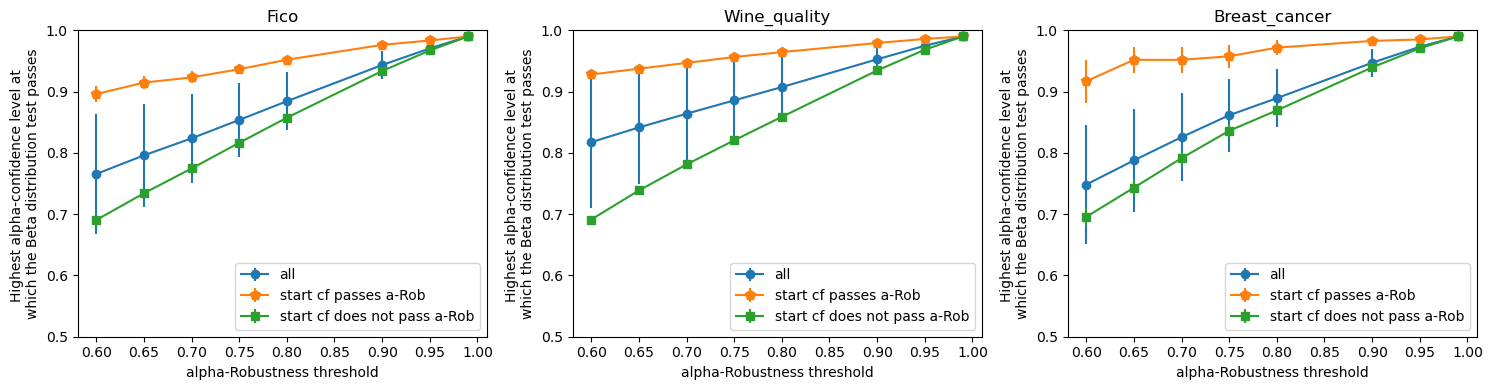

Done!


In [7]:
def alpha_vs_lowest_alpha(datasets: list = ['fico', 'wine_quality', 'breast_cancer'], 
        base_method: str = 'gs',
        robust_method: str = 'statrob',
        experiment: str = 'SameSampleExperimentData',
        ensemble: str = 'mlp-torch',
        threshs: list[int] = THRESHS,
        CI_level: float = 0.95,
        save_filename: str = None
    ) -> None:
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    
    x_minval = 0.5
    
    for dataset, ax in zip(datasets, axs):
        results = read_results(dataset, robust_method, experiment, base_method, ensemble)
    
        measurements = []
        maxalphas = []
        start_sample_passing = []
        cols_validity = None
    
        for exres in results.values():
            res = exres.get_results_as_pandas()
            res = res.dropna()
            cols_validity = [x for x in res.columns if 'validity' in x and '_2' in x]
            measurements.append(res[cols_validity].to_numpy())
            
            maxalpha = [x['highest_confidence'] for x in exres.records['artifacts']]
            start_sample_pass_list = [x['start_sample_passes_test'] for x in exres.records['artifacts']]
            
            maxalphas.append(maxalpha)
            start_sample_passing.append(start_sample_pass_list)
        
        z_ci = np.abs(stats.norm.ppf((1-CI_level)/2))
        
        # Normal 
        means = np.array([np.mean(m, axis=0) for m in measurements])
        stds = np.array([np.std(m, axis=0) for m in measurements])
        Ci_99 = np.array([z_ci * s / np.sqrt(len(m)) for m, s in zip(measurements, stds)])
        
        # Max alpha
        ma_means = np.array([np.mean(m) for m in maxalphas])
        ma_stds = np.array([np.std(m) for m in maxalphas])
        ma_Ci_99 = np.array([z_ci * s / np.sqrt(len(maxalphas)) for s in ma_stds])
        
        # Start sample passing
        ssp_measurements_filterd = []
        for meas, ssp in zip(maxalphas, start_sample_passing):
            filtered = list(filter(lambda x: x[1] is True, zip(meas, ssp)))
            ssp_measurements_filterd.append([x[0] for x in filtered])
        
        ssp_means = np.array([np.mean(m, axis=0) for m in ssp_measurements_filterd])
        ssp_stds = np.array([np.std(m, axis=0) for m in ssp_measurements_filterd])
        ssp_Ci_99 = np.array([z_ci * s / np.sqrt(len(m)) for m, s in zip(ssp_measurements_filterd, ssp_stds)])

        # Start sample not passing
        ssnp_measurements_filterd = []
        for meas, ssp in zip(maxalphas, start_sample_passing):
            filtered = list(filter(lambda x: x[1] is False, zip(meas, ssp)))
            ssnp_measurements_filterd.append([x[0] for x in filtered])
        
        ssnp_means = np.array([np.mean(m, axis=0) for m in ssnp_measurements_filterd])
        ssnp_stds = np.array([np.std(m, axis=0) for m in ssnp_measurements_filterd])
        ssnp_Ci_99 = np.array([z_ci * s / np.sqrt(len(m)) for m, s in zip(ssnp_measurements_filterd, ssnp_stds)])
            
        # Reference x-axis
        alphas = [float(f'0.{t}') for t in threshs]
        
        # x_minval = min(x_minval, np.min(ma_means - ma_Ci_99))
        # x_minval = min(x_minval, np.min(ssp_means - ssp_Ci_99))
        # x_minval = min(x_minval, np.min(ssnp_means - ssnp_Ci_99))
        # x_minval = max(0, x_minval - 0.1)
        
    
        # map_names = {
        #     'validity_2': 'base',
        #     'robust_validity_2': 'statrob '
        # }
    
        # for i, col in enumerate(cols_validity):
        #     ax.errorbar(alphas, [m[i] for m in means], yerr=[c[i] for c in Ci_99], label=map_names[col], fmt='-o')
            
        ax.errorbar(alphas, ma_means, yerr=ma_Ci_99, label='all', fmt='-o')
        ax.errorbar(alphas, [m for m in ssp_means], yerr=[c for c in ssp_Ci_99], label='start cf passes a-Rob', fmt='-p', markersize=7)
        ax.errorbar(alphas, [m for m in ssnp_means], yerr=[c for c in ssnp_Ci_99], label='start cf does not pass a-Rob', fmt='-s')
            
        ax.set_xlabel('alpha-Robustness threshold')
        ax.set_ylabel('Highest alpha-confidence level at \nwhich the Beta distribution test passes')
        ax.set_title(f'{dataset.capitalize()}')
        ax.legend(loc='lower right')
        
    
    print('x_minval:', x_minval)
    # set limits
    for ax in axs:
        ax.set_ylim(x_minval, 1)
        # ax.grid(True)
    
    # plt.suptitle(f'Returned cf\'s lowest alpha passing test vs alpha-Robustness \n ({int(CI_level*100)}% confidence intervals)')
    plt.tight_layout()
    
    if save_filename:
        os.makedirs(os.path.dirname(save_filename), exist_ok=True)
        plt.savefig(save_filename, dpi=300, bbox_inches='tight')
    
    plt.show()
    


SAVE_DIR = 'results_big_benchmark_march6/plots/alpha_vs_lowest_alpha'
print('Saving to', SAVE_DIR)
print('Starting to plot...')
for experiment_type in ['SameSampleExperimentData', 'TwoSamplesOneDatasetExperimentData']:
    print('='*40 + f' Experiment type: {experiment_type} ' + '='*40)
    for base_method in ['gs', 'dice']:
        save_filepath = f'{SAVE_DIR}/alpha_vs_lowest_alpha_{base_method}_{experiment_type}.png'
        print(f'Plotting with base method {base_method} and saving to {save_filepath}')
        alpha_vs_lowest_alpha(base_method=base_method, experiment=experiment_type, save_filename=save_filepath)

print('Done!')

<div style="background-color: #880000; color: #FFFFFF; font-weight: bold; padding: 10px; margin: 10px 0 20px 0; text-align: center; border-radius: 10px;">Statrob empirical validity, divided on base and optimized versions</div>

Saving to results_big_benchmark_march6/plots/empirical_vs_alpha_split
Starting to plot...
======================================== Experiment type: SameSampleExperimentData ========================================
Plotting with base method gs and saving to results_big_benchmark_march6/plots/empirical_vs_alpha_split/empirical_vs_alpha_splitgs_SameSampleExperimentData.png
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
x_minval: 0.595706011676514


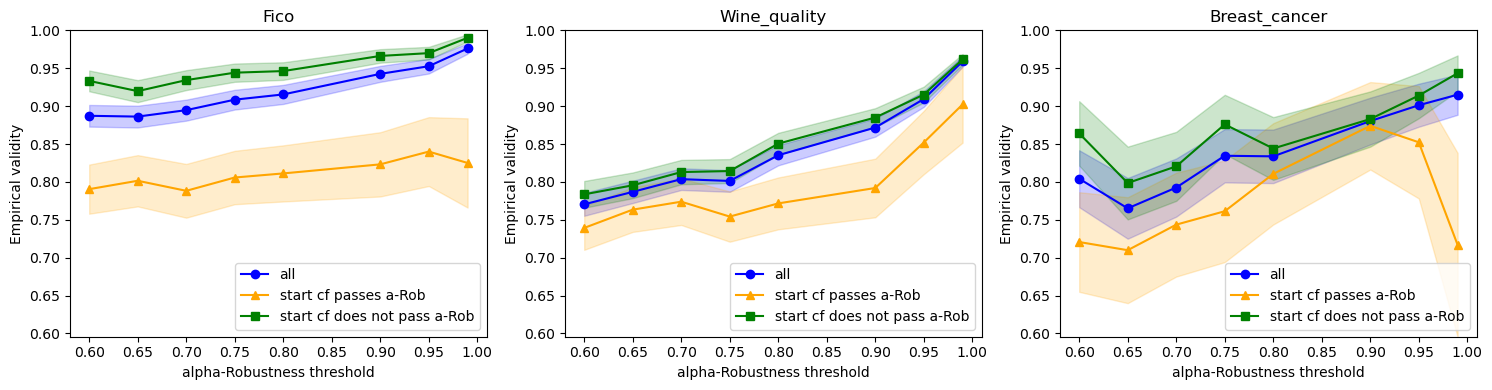

Plotting with base method dice and saving to results_big_benchmark_march6/plots/empirical_vs_alpha_split/empirical_vs_alpha_splitdice_SameSampleExperimentData.png
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
x_minval: 0.8286181829855948


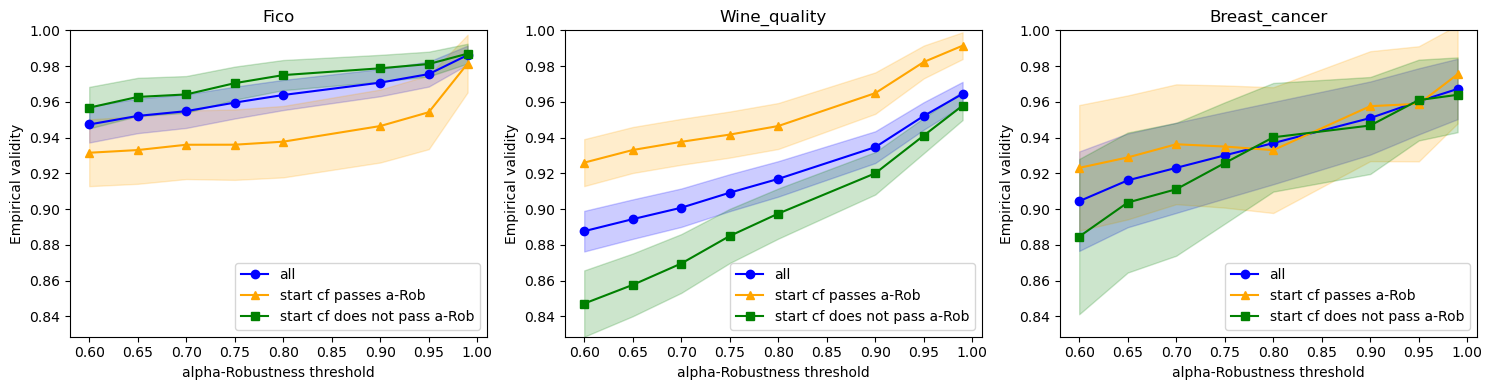

======================================== Experiment type: TwoSamplesOneDatasetExperimentData ========================================
Plotting with base method gs and saving to results_big_benchmark_march6/plots/empirical_vs_alpha_split/empirical_vs_alpha_splitgs_TwoSamplesOneDatasetExperimentData.png
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
x_minval: 0.2999620134851954


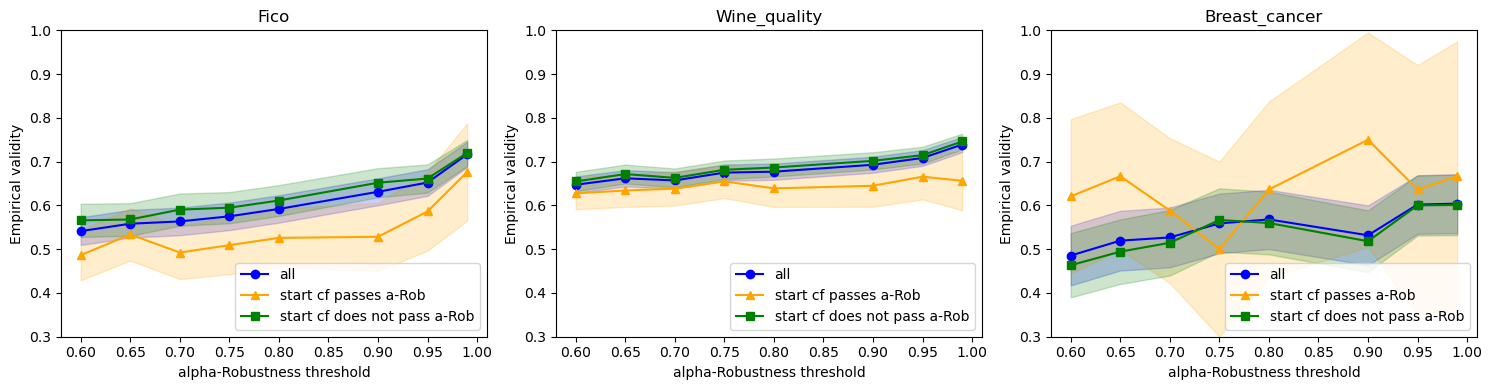

Plotting with base method dice and saving to results_big_benchmark_march6/plots/empirical_vs_alpha_split/empirical_vs_alpha_splitdice_TwoSamplesOneDatasetExperimentData.png
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
x_minval: 0.48532275121743346


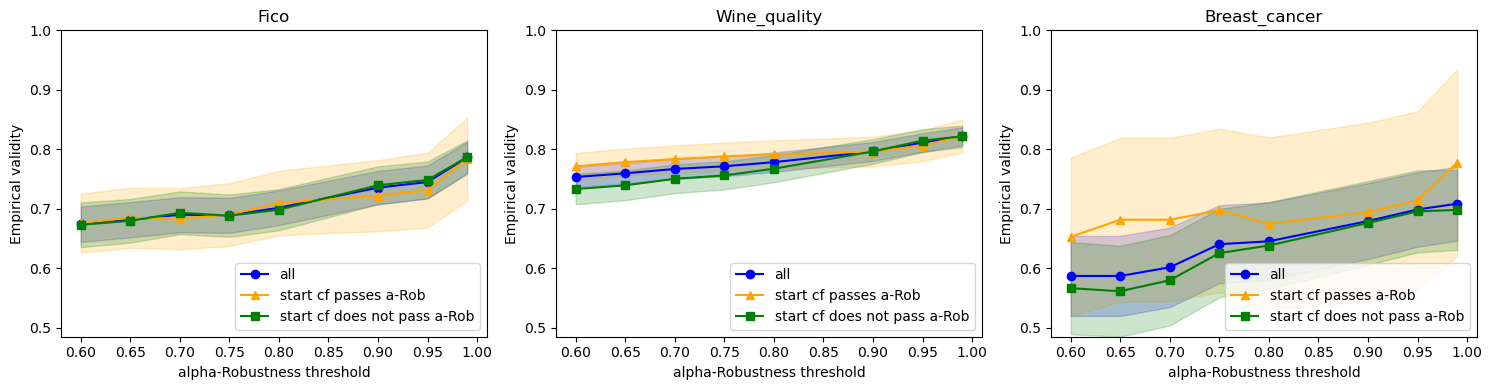

Done!


In [8]:
def empirical_vs_alpha_divided(datasets: list = ['fico', 'wine_quality', 'breast_cancer'], 
        base_method: str = 'gs',
        robust_method: str = 'statrob',
        experiment: str = 'SameSampleExperimentData',
        ensemble: str = 'mlp-torch',
        threshs: list[int] = THRESHS,
        CI_level: float = 0.95,
        save_filename: str = None
    ) -> None:
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    
    x_minval = 1
    
    for dataset, ax in zip(datasets, axs):
        results = read_results(dataset, robust_method, experiment, base_method, ensemble)
    
        measurements = []
        start_sample_passing = []
    
        for exres in results.values():
            res = exres.get_results_as_pandas()
            res = res.dropna()
            measurements.append(res['robust_validity_2'].to_numpy())
            
            start_sample_pass_list = [x['start_sample_passes_test'] for x in exres.records['artifacts']]
            start_sample_passing.append(start_sample_pass_list)
        
        z_ci = np.abs(stats.norm.ppf((1-CI_level)/2))
        
        # Normal 
        means = np.array([np.mean(m, axis=0) for m in measurements])
        Ci_99 = np.array([z_ci * np.sqrt((p*(1-p))/len(m)) for m, p in zip(measurements, means)])
        
        # Start sample passing
        ssp_measurements_filterd = []
        for meas, ssp in zip(measurements, start_sample_passing):
            filtered = list(filter(lambda x: x[1] is True, zip(meas, ssp)))
            ssp_measurements_filterd.append([x[0] for x in filtered])
        
        ssp_means = np.array([np.mean(m, axis=0) for m in ssp_measurements_filterd])
        ssp_Ci_99 = np.array([z_ci * np.sqrt((p*(1-p))/len(m)) for m, p in zip(ssp_measurements_filterd, ssp_means)])

        # Start sample not passing
        ssnp_measurements_filterd = []
        for meas, ssp in zip(measurements, start_sample_passing):
            filtered = list(filter(lambda x: x[1] is False, zip(meas, ssp)))
            ssnp_measurements_filterd.append([x[0] for x in filtered])
        
        ssnp_means = np.array([np.mean(m, axis=0) for m in ssnp_measurements_filterd])
        ssnp_Ci_99 = np.array([z_ci * np.sqrt((p*(1-p))/len(m)) for m, p in zip(ssnp_measurements_filterd, ssnp_means)])
            
        # Reference x-axis
        alphas = [float(f'0.{t}') for t in threshs]
        
        # Plot lines with shaded confidence intervals
        ax.plot(alphas, means, label='all', color='blue', marker='o')
        ax.fill_between(alphas, means - Ci_99, means + Ci_99, color='blue', alpha=0.2)
        
        ax.plot(alphas, ssp_means, label='start cf passes a-Rob', color='orange', marker='^')
        ax.fill_between(alphas, ssp_means - ssp_Ci_99, ssp_means + ssp_Ci_99, color='orange', alpha=0.2)
        
        ax.plot(alphas, ssnp_means, label='start cf does not pass a-Rob', color='green', marker='s')
        ax.fill_between(alphas, ssnp_means - ssnp_Ci_99, ssnp_means + ssnp_Ci_99, color='green', alpha=0.2)
            
        ax.set_xlabel('alpha-Robustness threshold')
        ax.set_ylabel('Empirical validity')
        ax.set_title(f'{dataset.capitalize()}')
        ax.legend(loc='lower right')
        
        
        x_minval = min(x_minval, np.min(means - Ci_99))
        x_minval = min(x_minval, np.min(ssp_means - ssp_Ci_99))
        x_minval = min(x_minval, np.min(ssnp_means - ssnp_Ci_99))
        
    
    print('x_minval:', x_minval)
    # set limits
    for ax in axs:
        ax.set_ylim(x_minval, 1)
        
    plt.tight_layout()
    
    if save_filename:
        os.makedirs(os.path.dirname(save_filename), exist_ok=True)
        plt.savefig(save_filename, dpi=300, bbox_inches='tight')
    
    plt.show()

    


SAVE_DIR = 'results_big_benchmark_march6/plots/empirical_vs_alpha_split'
print('Saving to', SAVE_DIR)
print('Starting to plot...')
for experiment_type in ['SameSampleExperimentData', 'TwoSamplesOneDatasetExperimentData']:
    print('='*40 + f' Experiment type: {experiment_type} ' + '='*40)
    for base_method in ['gs', 'dice']:
        save_filepath = f'{SAVE_DIR}/empirical_vs_alpha_split{base_method}_{experiment_type}.png'
        print(f'Plotting with base method {base_method} and saving to {save_filepath}')
        empirical_vs_alpha_divided(base_method=base_method, experiment=experiment_type, save_filename=save_filepath)
print('Done!')

<div style="background-color: #880000; color: #FFFFFF; font-weight: bold; padding: 10px; margin: 10px 0 20px 0; text-align: center; border-radius: 10px;">RobX vs Statrob fidelity to the base counterfactual</div>

Starting to plot...
+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+= Metric: proximityL1 +=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=
======================================== Experiment type: SameSampleExperimentData ========================================
---------------------------------------- Base method: gs ----------------------------------------
Plotting with base method gs and saving to results_big_benchmark_march6/plots/metric_vs_alpha_rob/proximityL1/proximityL1_vs_alpha_rob_gs_SameSampleExperimentData.png
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
[0.36923126 0.3727212  0.37923195 0.38500817 0.39623123 0.42222963
 0.44477577 0.49032696]
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
x_minval: 0.0901368407728364


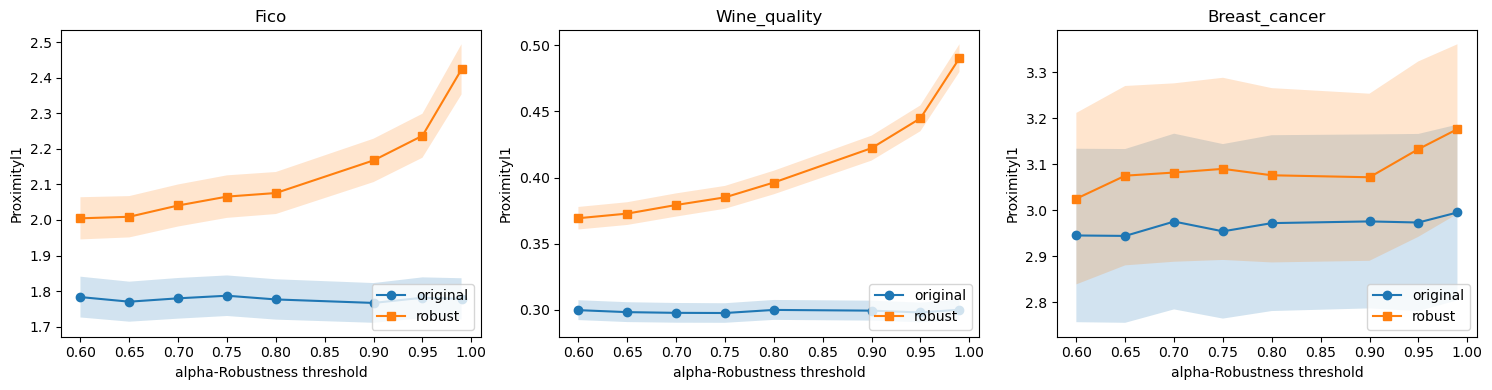

---------------------------------------- Base method: dice ----------------------------------------
Plotting with base method dice and saving to results_big_benchmark_march6/plots/metric_vs_alpha_rob/proximityL1/proximityL1_vs_alpha_rob_dice_SameSampleExperimentData.png
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
[0.93274681 0.94389208 0.95776145 0.97723514 0.99714312 1.05119381
 1.09581292 1.17385346]
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
x_minval: 0.20000000000000004


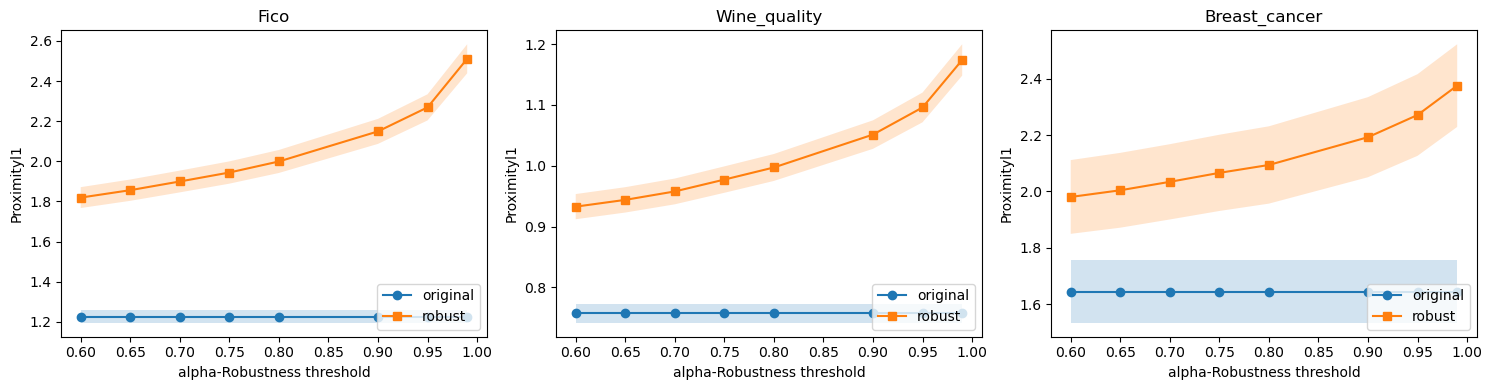

======================================== Experiment type: TwoSamplesOneDatasetExperimentData ========================================
---------------------------------------- Base method: gs ----------------------------------------
Plotting with base method gs and saving to results_big_benchmark_march6/plots/metric_vs_alpha_rob/proximityL1/proximityL1_vs_alpha_rob_gs_TwoSamplesOneDatasetExperimentData.png
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
[0.50139173 0.50618604 0.5125421  0.51655963 0.52503327 0.54745706
 0.56835244 0.60525537]
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
x_minval: 0.17935750237060552


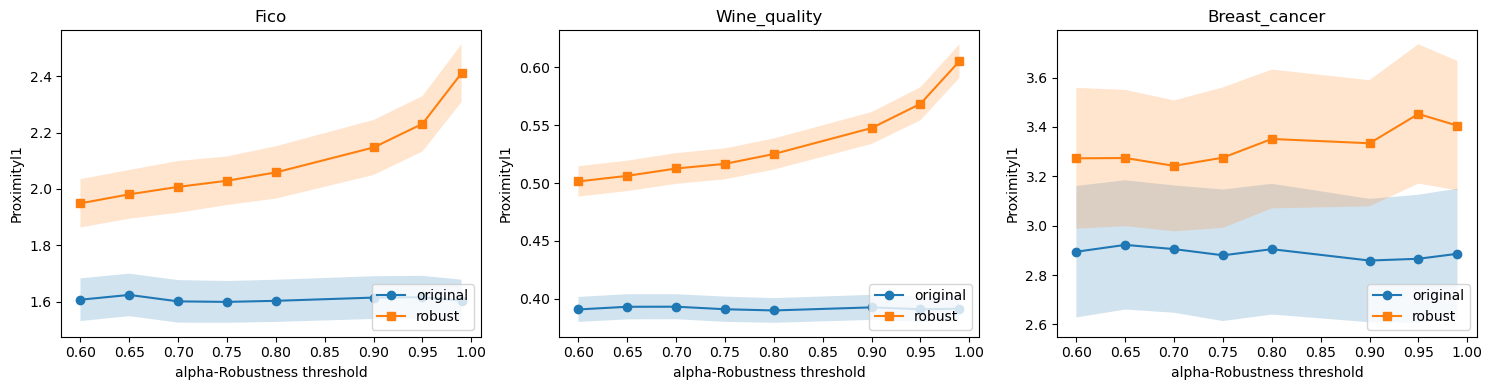

---------------------------------------- Base method: dice ----------------------------------------
Plotting with base method dice and saving to results_big_benchmark_march6/plots/metric_vs_alpha_rob/proximityL1/proximityL1_vs_alpha_rob_dice_TwoSamplesOneDatasetExperimentData.png
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
[0.92072908 0.92980223 0.94001079 0.95141478 0.96482924 1.00199448
 1.03431157 1.08940723]
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
x_minval: 0.20000000000000004


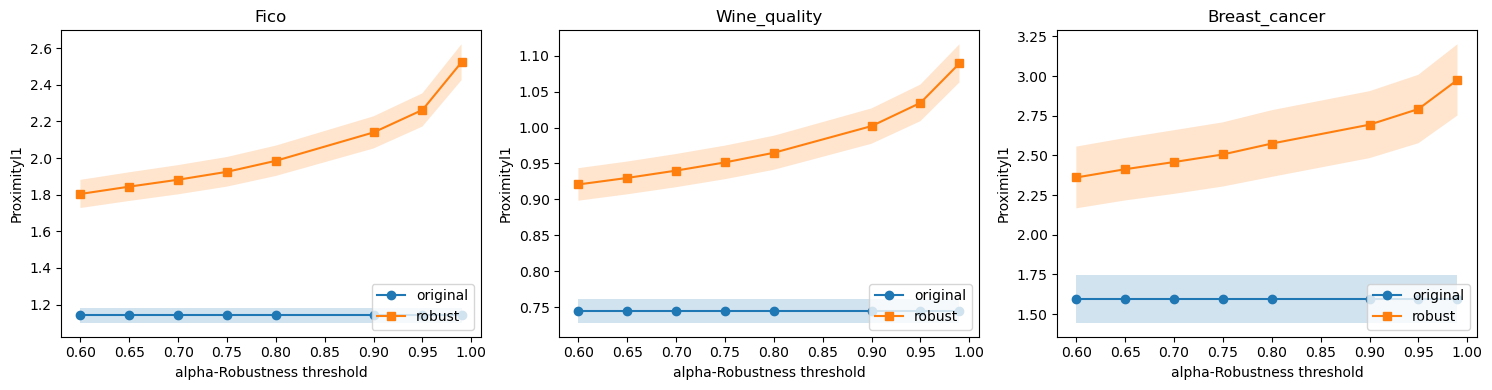

+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+= Metric: proximityL2 +=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=
======================================== Experiment type: SameSampleExperimentData ========================================
---------------------------------------- Base method: gs ----------------------------------------
Plotting with base method gs and saving to results_big_benchmark_march6/plots/metric_vs_alpha_rob/proximityL2/proximityL2_vs_alpha_rob_gs_SameSampleExperimentData.png
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
[0.13716896 0.13860174 0.14152057 0.14346089 0.14725566 0.15671789
 0.16493603 0.18191759]
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
x_minval: 0


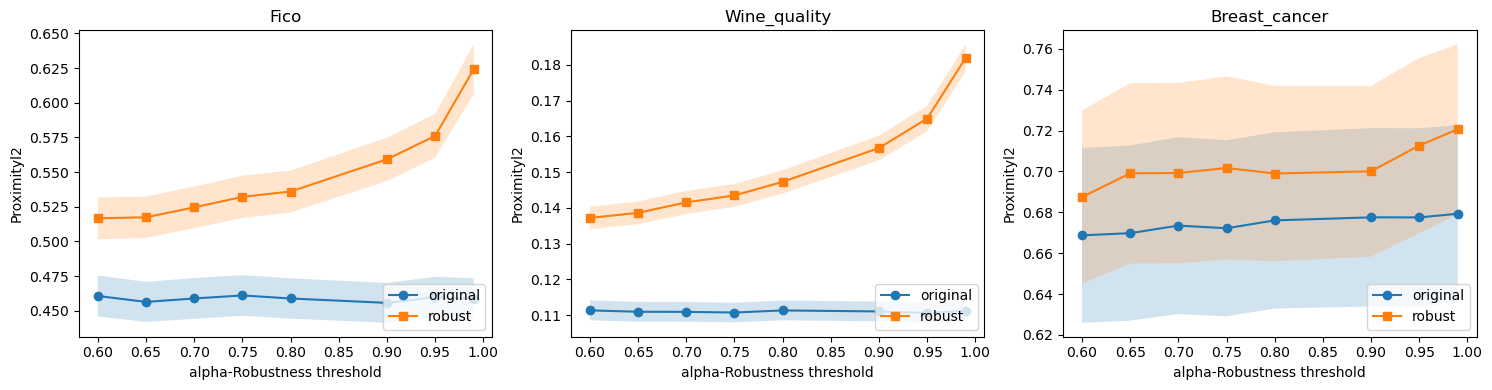

---------------------------------------- Base method: dice ----------------------------------------
Plotting with base method dice and saving to results_big_benchmark_march6/plots/metric_vs_alpha_rob/proximityL2/proximityL2_vs_alpha_rob_dice_SameSampleExperimentData.png
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
[0.61741124 0.61751972 0.61722341 0.61823638 0.61938913 0.62284039
 0.62646001 0.6332065 ]
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
x_minval: 0.20000000000000004


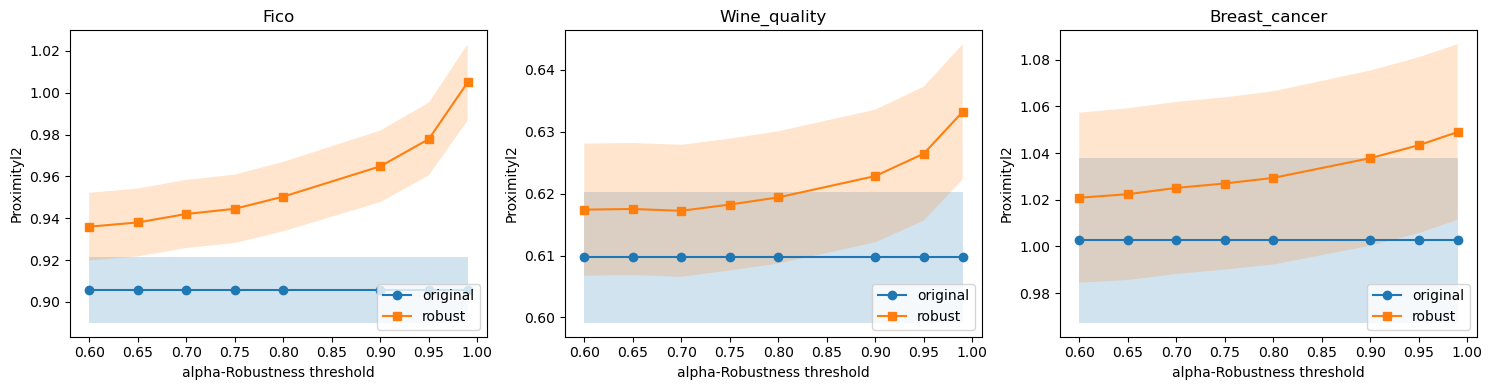

======================================== Experiment type: TwoSamplesOneDatasetExperimentData ========================================
---------------------------------------- Base method: gs ----------------------------------------
Plotting with base method gs and saving to results_big_benchmark_march6/plots/metric_vs_alpha_rob/proximityL2/proximityL2_vs_alpha_rob_gs_TwoSamplesOneDatasetExperimentData.png
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
[0.18484263 0.18650184 0.18905861 0.19075825 0.19426269 0.20226617
 0.21014687 0.22353336]
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
x_minval: 0


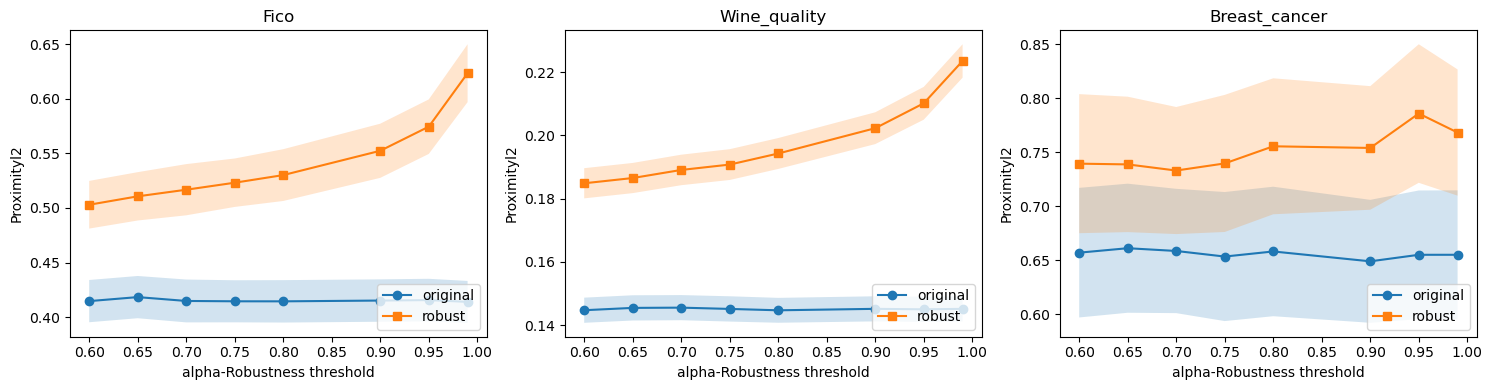

---------------------------------------- Base method: dice ----------------------------------------
Plotting with base method dice and saving to results_big_benchmark_march6/plots/metric_vs_alpha_rob/proximityL2/proximityL2_vs_alpha_rob_dice_TwoSamplesOneDatasetExperimentData.png
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
[0.61150062 0.61193351 0.61279212 0.61358396 0.61419438 0.61798602
 0.62139732 0.62661474]
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
x_minval: 0.20000000000000004


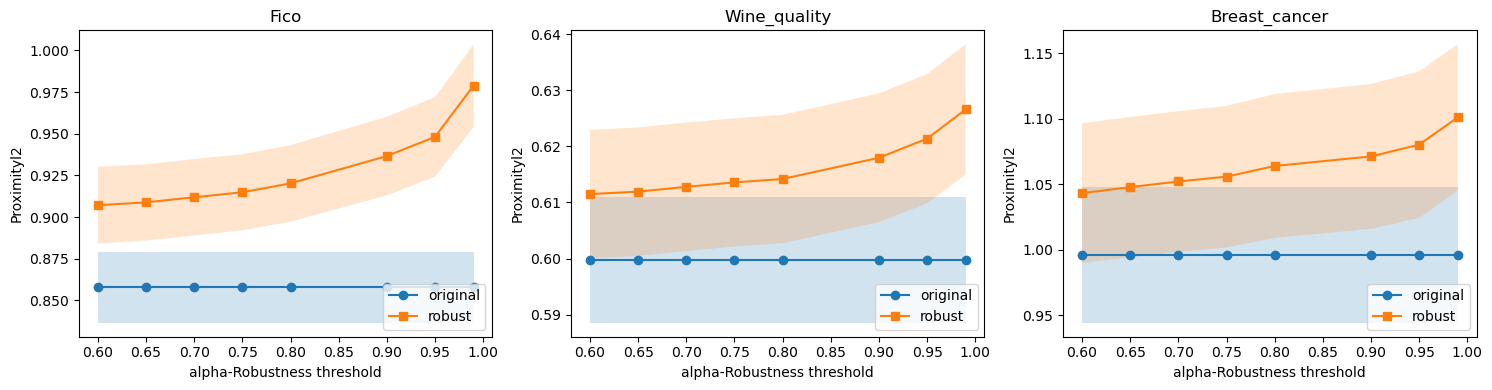

+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+= Metric: dpow +=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=
======================================== Experiment type: SameSampleExperimentData ========================================
---------------------------------------- Base method: gs ----------------------------------------
Plotting with base method gs and saving to results_big_benchmark_march6/plots/metric_vs_alpha_rob/dpow/dpow_vs_alpha_rob_gs_SameSampleExperimentData.png
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
[0.3952333  0.40337921 0.40315542 0.40727313 0.41904442 0.43084844
 0.44640698 0.47331319]
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
x_minval: 0.04751689038037962


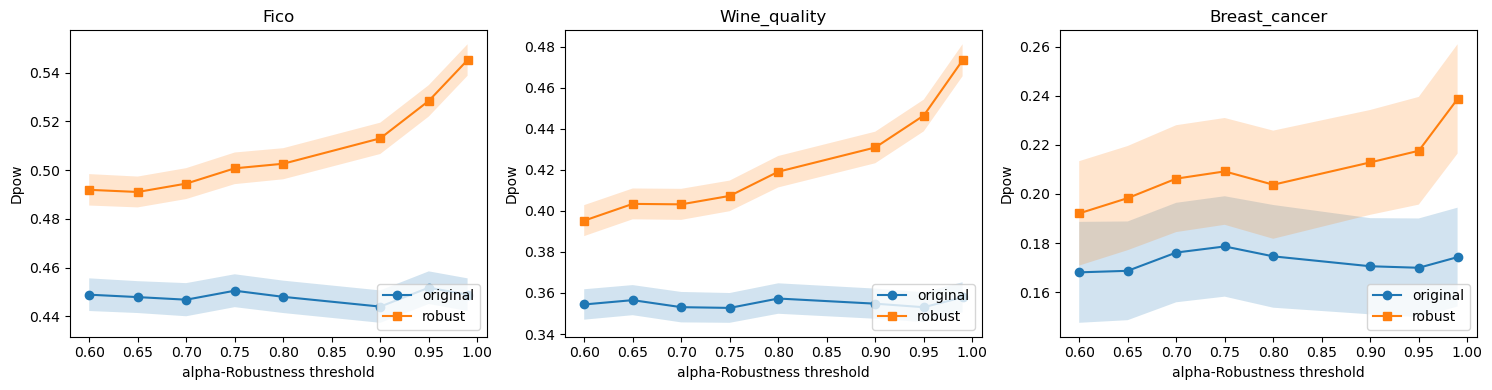

---------------------------------------- Base method: dice ----------------------------------------
Plotting with base method dice and saving to results_big_benchmark_march6/plots/metric_vs_alpha_rob/dpow/dpow_vs_alpha_rob_dice_SameSampleExperimentData.png
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
[0.59053706 0.59459581 0.59961879 0.60284785 0.60462091 0.61998428
 0.63140031 0.65397362]
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
x_minval: 0.15710408476358537


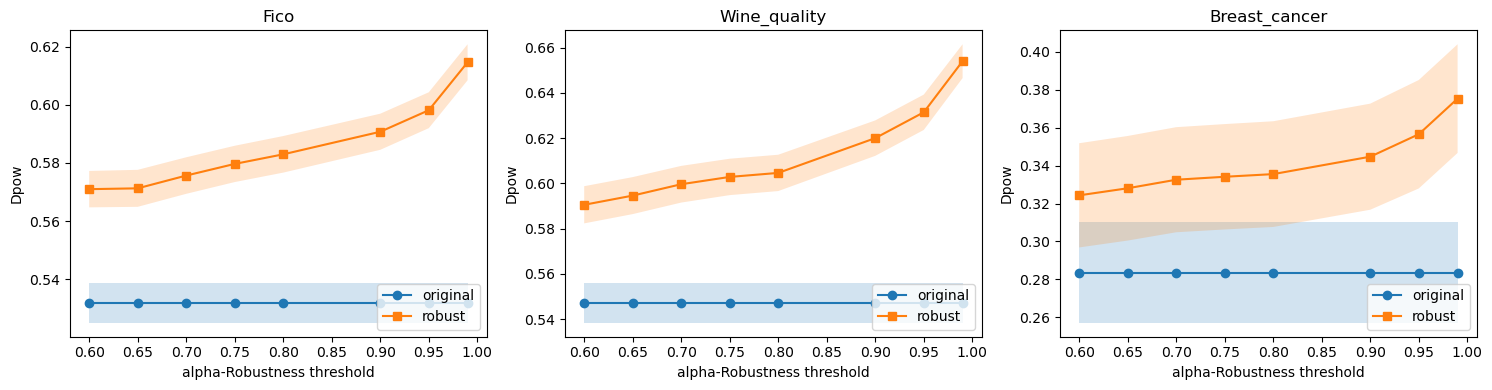

======================================== Experiment type: TwoSamplesOneDatasetExperimentData ========================================
---------------------------------------- Base method: gs ----------------------------------------
Plotting with base method gs and saving to results_big_benchmark_march6/plots/metric_vs_alpha_rob/dpow/dpow_vs_alpha_rob_gs_TwoSamplesOneDatasetExperimentData.png
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
[0.44189777 0.44410005 0.45019032 0.4502447  0.45266449 0.4641925
 0.47879282 0.50002719]
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
x_minval: 0.020163713225546276


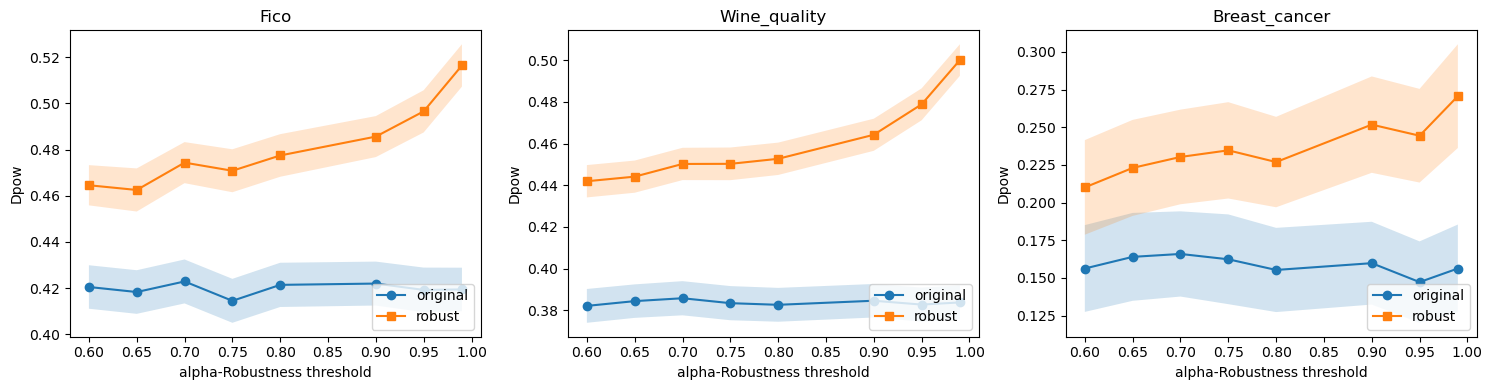

---------------------------------------- Base method: dice ----------------------------------------
Plotting with base method dice and saving to results_big_benchmark_march6/plots/metric_vs_alpha_rob/dpow/dpow_vs_alpha_rob_dice_TwoSamplesOneDatasetExperimentData.png
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
[0.58958673 0.59013051 0.59491572 0.59923872 0.60277325 0.61598695
 0.62699837 0.64371005]
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
x_minval: 0.08595324525962428


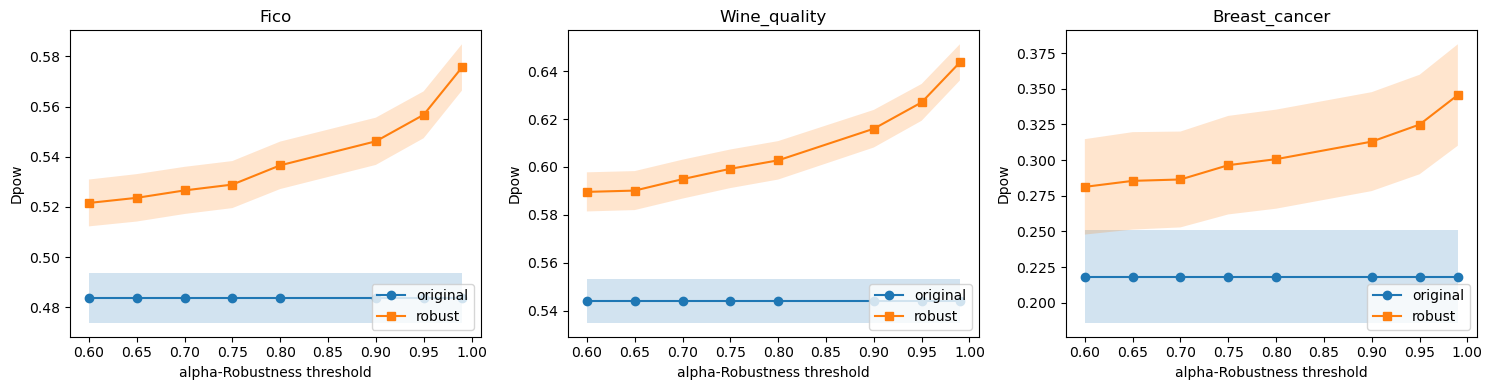

+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+= Metric: plausibility +=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=
======================================== Experiment type: SameSampleExperimentData ========================================
---------------------------------------- Base method: gs ----------------------------------------
Plotting with base method gs and saving to results_big_benchmark_march6/plots/metric_vs_alpha_rob/plausibility/plausibility_vs_alpha_rob_gs_SameSampleExperimentData.png
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
[0.19619463 0.19614363 0.19817446 0.19826626 0.19898287 0.20194087
 0.20378473 0.21040341]
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
x_minval: 0


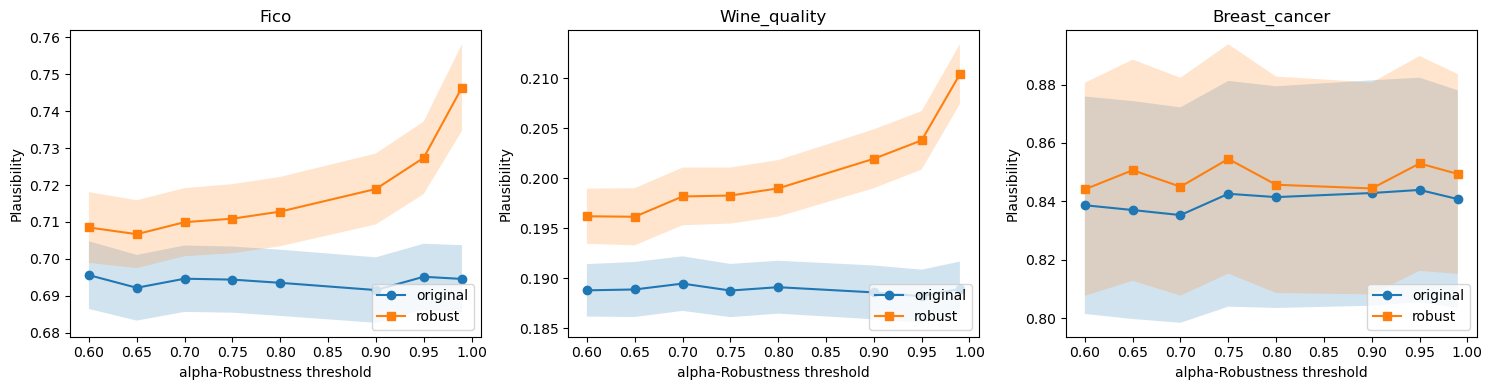

---------------------------------------- Base method: dice ----------------------------------------
Plotting with base method dice and saving to results_big_benchmark_march6/plots/metric_vs_alpha_rob/plausibility/plausibility_vs_alpha_rob_dice_SameSampleExperimentData.png
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
[0.48750242 0.48711217 0.48591836 0.48603105 0.48593984 0.48579814
 0.48720602 0.48961244]
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
x_minval: 0.20000000000000004


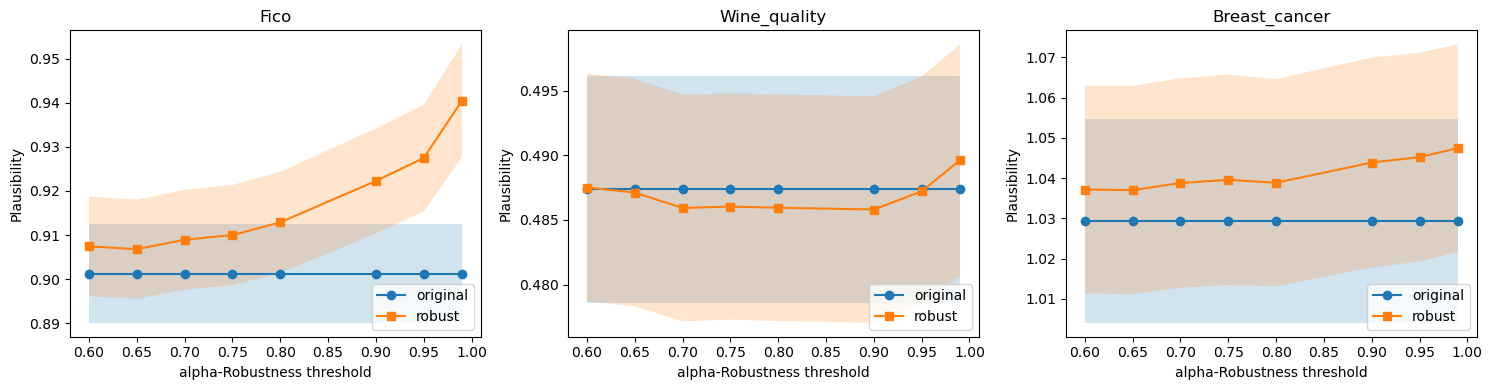

======================================== Experiment type: TwoSamplesOneDatasetExperimentData ========================================
---------------------------------------- Base method: gs ----------------------------------------
Plotting with base method gs and saving to results_big_benchmark_march6/plots/metric_vs_alpha_rob/plausibility/plausibility_vs_alpha_rob_gs_TwoSamplesOneDatasetExperimentData.png
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
[0.25223548 0.25310083 0.25303143 0.25400171 0.25534948 0.2582522
 0.26017042 0.26339367]
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
x_minval: 0.03607587366691423


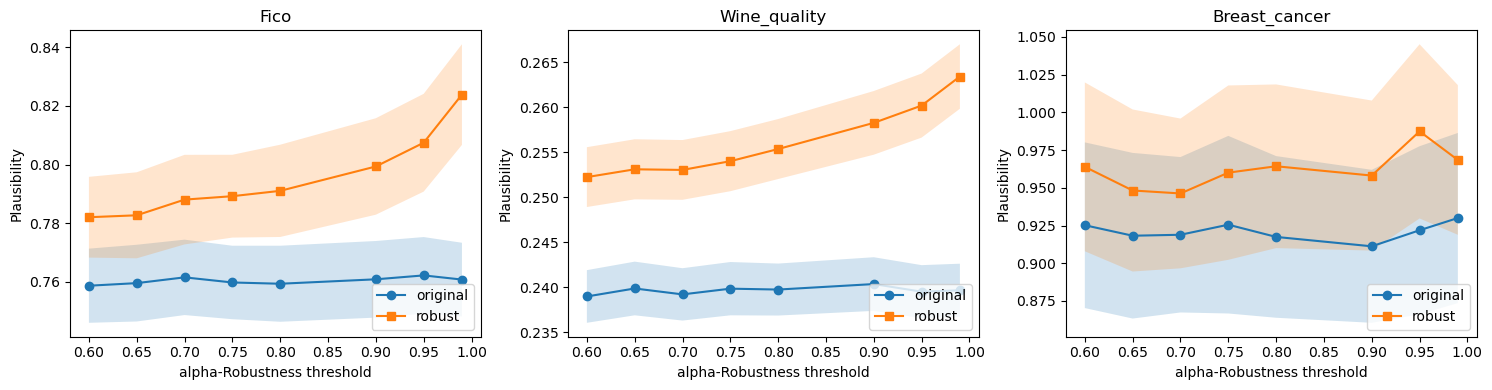

---------------------------------------- Base method: dice ----------------------------------------
Plotting with base method dice and saving to results_big_benchmark_march6/plots/metric_vs_alpha_rob/plausibility/plausibility_vs_alpha_rob_dice_TwoSamplesOneDatasetExperimentData.png
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
[0.50554927 0.50547103 0.50521655 0.50505724 0.50463441 0.50489673
 0.50575604 0.50670544]
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
x_minval: 0.20000000000000004


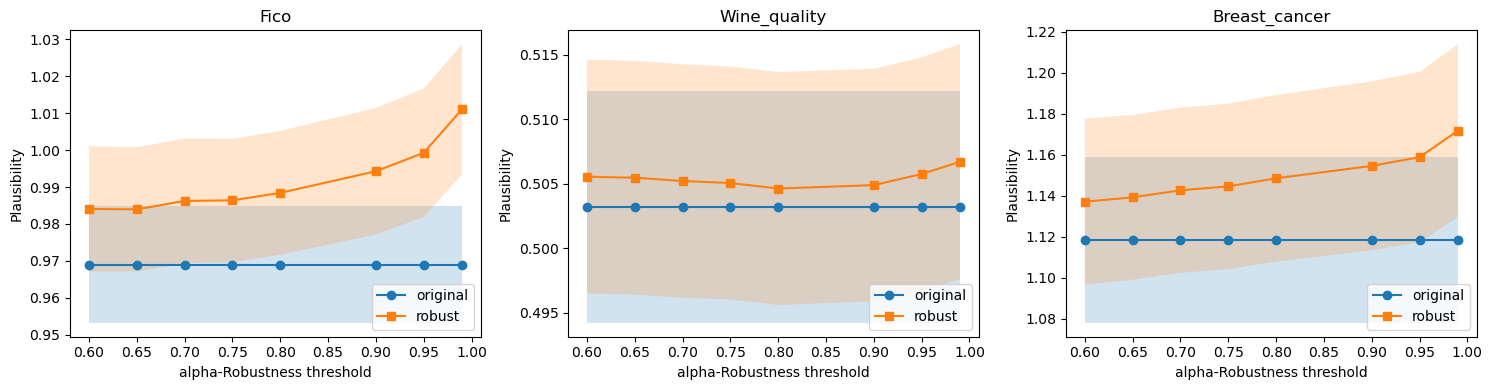

+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+= Metric: validity_2 +=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=
======================================== Experiment type: SameSampleExperimentData ========================================
---------------------------------------- Base method: gs ----------------------------------------
Plotting with base method gs and saving to results_big_benchmark_march6/plots/metric_vs_alpha_rob/validity_2/validity_2_vs_alpha_rob_gs_SameSampleExperimentData.png
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
[0.77039275 0.78684122 0.80362538 0.8012756  0.83517959 0.87172599
 0.90933512 0.95904666]
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
x_minval: 0.20000000000000004


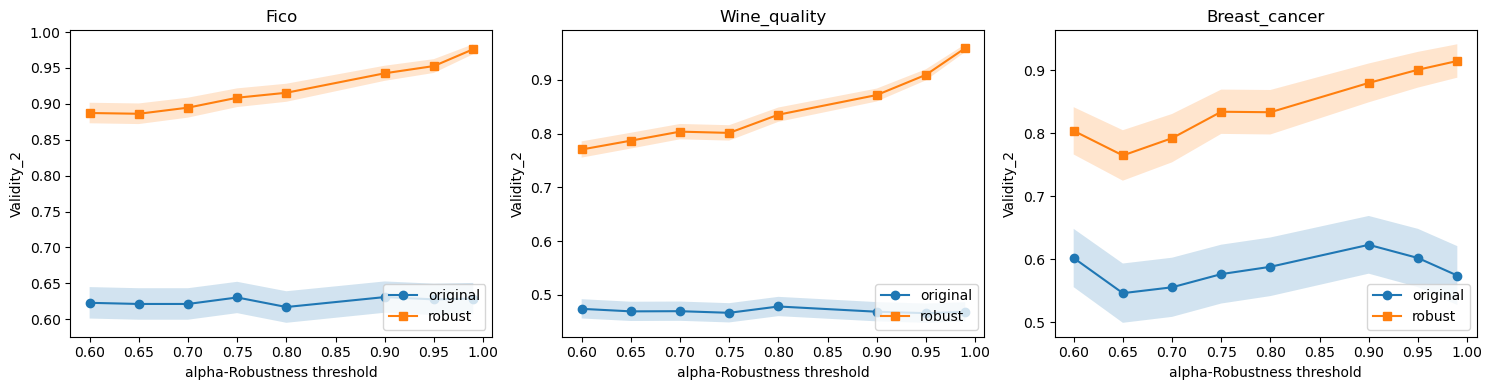

---------------------------------------- Base method: dice ----------------------------------------
Plotting with base method dice and saving to results_big_benchmark_march6/plots/metric_vs_alpha_rob/validity_2/validity_2_vs_alpha_rob_dice_SameSampleExperimentData.png
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
[0.88765557 0.89438278 0.90077363 0.90918264 0.91689098 0.93465813
 0.95212407 0.96449104]
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
x_minval: 0.20000000000000004


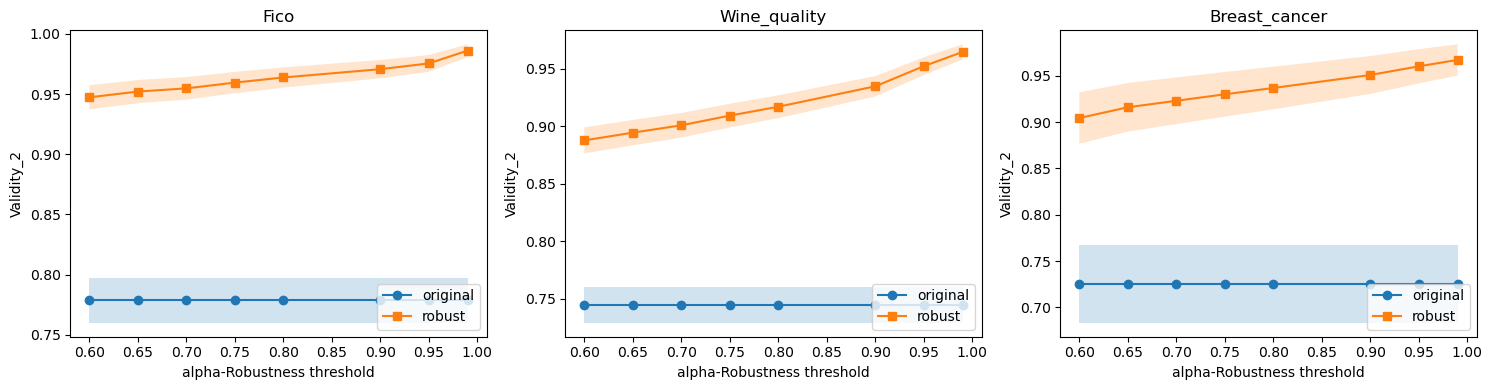

======================================== Experiment type: TwoSamplesOneDatasetExperimentData ========================================
---------------------------------------- Base method: gs ----------------------------------------
Plotting with base method gs and saving to results_big_benchmark_march6/plots/metric_vs_alpha_rob/validity_2/validity_2_vs_alpha_rob_gs_TwoSamplesOneDatasetExperimentData.png
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
[0.64722675 0.66190865 0.65701468 0.67495922 0.67699837 0.69290375
 0.70840131 0.73898858]
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
x_minval: 0.046489485790128654


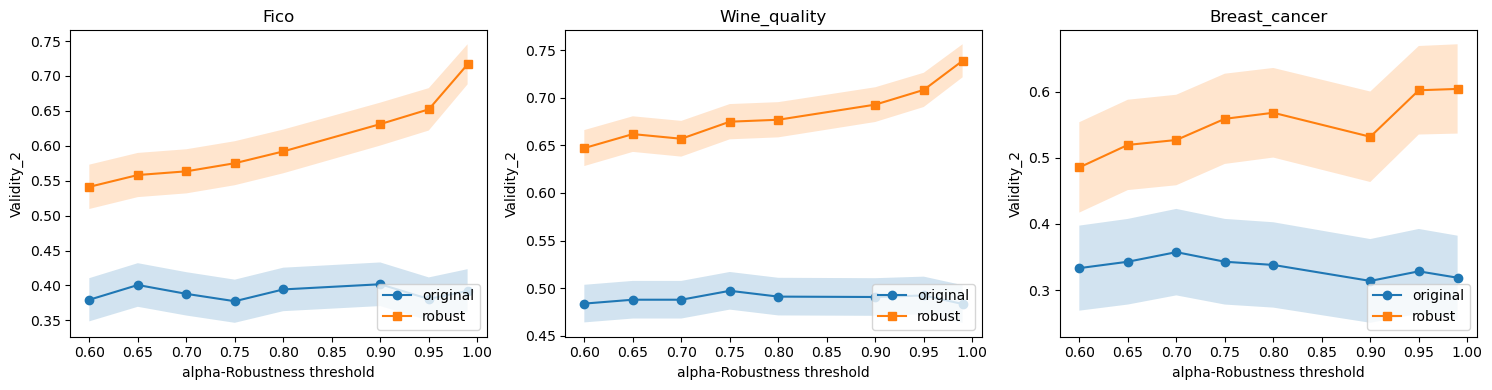

---------------------------------------- Base method: dice ----------------------------------------
Plotting with base method dice and saving to results_big_benchmark_march6/plots/metric_vs_alpha_rob/validity_2/validity_2_vs_alpha_rob_dice_TwoSamplesOneDatasetExperimentData.png
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
[0.75367047 0.75978793 0.76712887 0.77161501 0.77854812 0.79649266
 0.81158238 0.82211342]
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
x_minval: 0.20000000000000004


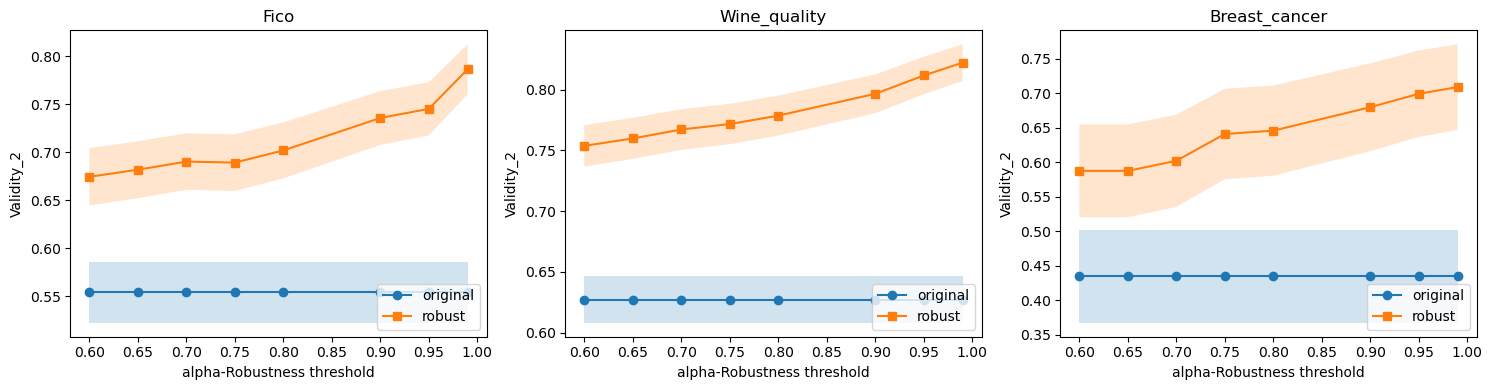

Done!


In [9]:
def plot_metric_vs_alpha_rob(metric: str,
        datasets: list = ['fico', 'wine_quality', 'breast_cancer'], 
        base_method: str = 'gs',
        robust_method: str = 'statrob',
        experiment: str = 'SameSampleExperimentData',
        ensemble: str = 'mlp-torch',
        threshs: list[int] = THRESHS,
        CI_level: float = 0.95,
        save_filename: str = None
    ) -> None:
    '''
    Available metrics: 'proximityL1', 'proximityL2', 'dpow', 'plausibility'
    '''

    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    
    x_minval = 0.5
    
    for dataset, ax in zip(datasets, axs):
        results = read_results(dataset, robust_method, experiment, base_method, ensemble)
    
        measurements_orig = []
        measurements_rob = []
    
        for exres in results.values():
            
            metric_orig = np.array(exres.get_results_for_metric(metric))
            metric_rob = np.array(exres.get_results_for_metric(f'robust_{metric}'))
            
            # remove nans
            metric_orig = metric_orig[~np.isnan(metric_orig)]
            metric_rob = metric_rob[~np.isnan(metric_rob)]
            
            measurements_orig.append(metric_orig)
            measurements_rob.append(metric_rob)
            
        z_stat = np.abs(stats.norm.ppf((1-CI_level)/2))
            
        # Original
        means_orig = np.array([np.mean(m) for m in measurements_orig])
        stds_orig = np.array([np.std(m) for m in measurements_orig])
        Ci_99_orig = np.array([z_stat * s / np.sqrt(len(m)) for m, s in zip(measurements_orig, stds_orig)])
        
        # Robust
        means_rob = np.array([np.mean(m) for m in measurements_rob])
        stds_rob = np.array([np.std(m) for m in measurements_rob])
        Ci_99_rob = np.array([z_stat * s / np.sqrt(len(m)) for m, s in zip(measurements_rob, stds_rob)])
            
        if dataset == 'wine_quality':
            print(means_rob)
        
        # Reference x-axis
        alphas = [float(f'0.{t}') for t in threshs]
        
        x_minval = min(x_minval, np.min(means_orig - Ci_99_orig))
        x_minval = min(x_minval, np.min(means_rob - Ci_99_rob))
        x_minval = max(0, x_minval - 0.1)
        
        # ax.errorbar(alphas, means_orig, yerr=Ci_99_orig, label='original', fmt='-o')
        # ax.errorbar(alphas, means_rob, yerr=Ci_99_rob, label='robust', fmt='-s')
        
        ax.plot(alphas, means_orig, label='original', marker='o')
        ax.fill_between(alphas, means_orig - Ci_99_orig, means_orig + Ci_99_orig, alpha=0.2)
        
        ax.plot(alphas, means_rob, label='robust', marker='s')
        ax.fill_between(alphas, means_rob - Ci_99_rob, means_rob + Ci_99_rob, alpha=0.2)
        
        ax.set_xlabel('alpha-Robustness threshold')
        ax.set_ylabel(f'{metric.capitalize()}')
        ax.set_title(f'{dataset.capitalize()}')
        ax.legend(loc='lower right')
        
    
    print('x_minval:', x_minval)
    # # set limits
    # for ax in axs:
    #     ax.set_ylim(x_minval, 1)
    #     # ax.grid(True)
        
    # plt.suptitle(f'{metric} vs alpha-Robustness \n ({int(CI_level*100)}% confidence intervals)')
    plt.tight_layout()
    
    if save_filename:
        os.makedirs(os.path.dirname(save_filename), exist_ok=True)
        plt.savefig(save_filename, dpi=300, bbox_inches='tight')
        
    plt.show()
    


print('Starting to plot...')
for metric in ['proximityL1', 'proximityL2', 'dpow', 'plausibility', 'validity_2']:
    SAVE_DIR = f'results_big_benchmark_march6/plots/metric_vs_alpha_rob/{metric}'
    print('+='*40 + f' Metric: {metric} ' + '+='*40)
    for experiment_type in ['SameSampleExperimentData', 'TwoSamplesOneDatasetExperimentData']:
        print('='*40 + f' Experiment type: {experiment_type} ' + '='*40)
        for base_method in ['gs', 'dice']:
                print('-'*40 + f' Base method: {base_method} ' + '-'*40)
                save_filepath = f'{SAVE_DIR}/{metric}_vs_alpha_rob_{base_method}_{experiment_type}.png'
                print(f'Plotting with base method {base_method} and saving to {save_filepath}')
                plot_metric_vs_alpha_rob(metric, base_method=base_method, experiment=experiment_type, save_filename=save_filepath)            
            
print('Done!')

In [10]:
# def plot_metric_vs_alpha_rob(metric: str,
#         datasets: list = ['fico', 'wine_quality', 'breast_cancer'], 
#         base_method: str = 'gs',
#         experiment: str = 'SameSampleExperimentData',
#         ensemble: str = 'mlp-torch',
#         threshs: list[int] = [60, 65, 70, 75, 80, 90, 95, 99, 9999],
#         CI_level: float = 0.95,
#         save_filename: str = None
#     ) -> None:
#     '''
#     Available metrics: 'proximityL1', 'proximityL2', 'dpow', 'feasibility'
#     '''

#     fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
#     x_minval = 0.5
    
#     for dataset, ax in zip(datasets, axs):
#         for robust_method in ['statrob', 'robx']:
#             results = read_results(dataset, robust_method, experiment, base_method, ensemble)
        
#             measurements_orig = []
#             measurements_rob = []
        
#             for exres in results.values():
                
#                 metric_orig = np.array(exres.get_results_for_metric(metric))
#                 metric_rob = np.array(exres.get_results_for_metric(f'robust_{metric}'))
                
#                 # remove nans
#                 metric_orig = metric_orig[~np.isnan(metric_orig)]
#                 metric_rob = metric_rob[~np.isnan(metric_rob)]
                
#                 measurements_orig.append(metric_orig)
#                 measurements_rob.append(metric_rob)
                
#             z_stat = np.abs(stats.norm.ppf((1-CI_level)/2))
                
#             # Original
#             means_orig = np.array([np.mean(m) for m in measurements_orig])
#             stds_orig = np.array([np.std(m) for m in measurements_orig])
#             Ci_99_orig = np.array([z_stat * s / np.sqrt(len(m)) for m, s in zip(measurements_orig, stds_orig)])
            
#             # Robust
#             means_rob = np.array([np.mean(m) for m in measurements_rob])
#             stds_rob = np.array([np.std(m) for m in measurements_rob])
#             Ci_99_rob = np.array([z_stat * s / np.sqrt(len(m)) for m, s in zip(measurements_rob, stds_rob)])
                
#             if dataset == 'wine_quality':
#                 print(means_rob)
            
#             # Reference x-axis
#             alphas = [float(f'0.{t}') for t in threshs]
            
#             x_minval = min(x_minval, np.min(means_orig - Ci_99_orig))
#             x_minval = min(x_minval, np.min(means_rob - Ci_99_rob))
#             x_minval = max(0, x_minval - 0.1)
            
#             ax.errorbar(alphas, means_orig, yerr=Ci_99_orig, label='original', fmt='-o')
#             ax.errorbar(alphas, means_rob, yerr=Ci_99_rob, label='robust', fmt='-o')
            
#             ax.set_xlabel('alpha-Robustness threshold')
#             ax.set_ylabel(f'{metric.capitalize()}')
#             ax.set_title(f'{dataset.capitalize()}')
#             ax.legend(loc='lower right')
            
        
#         print('x_minval:', x_minval)
            
#         plt.suptitle(f'{metric} vs alpha-Robustness \n ({int(CI_level*100)}% confidence intervals)')
#         plt.tight_layout()
        
#         if save_filename:
#             os.makedirs(os.path.dirname(save_filename), exist_ok=True)
#             plt.savefig(save_filename, dpi=300, bbox_inches='tight')
            
#         plt.show()
        


# print('Starting to plot...')
# for metric in ['proximityL1']:
#     SAVE_DIR = f'results_big_benchmark_march6/plots/metric_vs_alpha_rob/{metric}'
#     print('+='*40 + f' Metric: {metric} ' + '+='*40)
#     for experiment_type in ['SameSampleExperimentData', 'TwoSamplesOneDatasetExperimentData']:
#         print('='*40 + f' Experiment type: {experiment_type} ' + '='*40)
#         for base_method in ['gs', 'dice']:
#                 print('-'*40 + f' Base method: {base_method} ' + '-'*40)
#                 save_filepath = f'{SAVE_DIR}/{metric}_vs_alpha_rob_{base_method}_{experiment_type}.png'
#                 print(f'Plotting with base method {base_method} and saving to {save_filepath}')
#                 plot_metric_vs_alpha_rob(metric, base_method=base_method, experiment=experiment_type, save_filename=save_filepath)            
            
# print('Done!')

In [11]:
def print_metric_vs_alpha_rob(metrics: list[str] = ['validity_2', 'proximityL1', 'proximityL2', 'dpow', 'plausibility', 'robust_cf_to_base_cf_proximity_L1'],
        datasets: list = ['fico', 'wine_quality', 'breast_cancer'], 
        base_method: str = 'gs',
        robust_method: str = 'statrob',
        experiment: str = 'SameSampleExperimentData',
        ensemble: str = 'mlp-torch',
        threshs: list[int] = THRESHS,
        CI_level: float = 0.95,
        save_filename: str = None
    ) -> None:
    '''
    Available metrics: 'proximityL1', 'proximityL2', 'dpow', 'plaussibility', 'validity_2'
    '''
    
    select_threshs = [0, 1, 2, 3, 4, 5, 6, 7]
    __threshs = [threshs[i] for i in select_threshs]
    
    robx_cols = [f'robx-t{0.2+0.1*(i % 5):.2f}-var{0.01 if i < 5 else 0.1:.2f}' for i in range(8)]
    
    taus = [.2, .3, .4, .5, .6, .2, .4, .6]
    vars = [.01, .01, .01, .01, .01, .1, .1, .1]
    robx_cols = [f'robx-t{t:.2f}-var{v:.2f}' for t, v in zip(taus, vars)]
    
    dfs = []
    for dataset in datasets:
        df = pd.DataFrame(columns=metrics, index=['original'] + robx_cols + [f'(ours) statrob-{th}' for th in __threshs])
        for metric in metrics:
            for robust_method in ['robx', 'statrob']:
                results = read_results(dataset, robust_method, experiment, base_method, ensemble)
            
                measurements_orig = []
                measurements_rob = []
            
                for exres in results.values():
                    
                    metric_orig = np.array(exres.get_results_for_metric(metric))
                    metric_rob = np.array(exres.get_results_for_metric(f'robust_{metric}'))
                    
                    # remove nans
                    metric_orig = metric_orig[~np.isnan(metric_orig)]
                    metric_rob = metric_rob[~np.isnan(metric_rob)]
                    
                    measurements_orig.append(metric_orig)
                    measurements_rob.append(metric_rob)
                    
                z_stat = np.abs(stats.norm.ppf((1-CI_level)/2))
                    
                # Original
                means_orig = np.array([np.mean(m) for m in measurements_orig])
                stds_orig = np.array([np.std(m) for m in measurements_orig])
                Ci_99_orig = np.array([z_stat * s / np.sqrt(len(m)) for m, s in zip(measurements_orig, stds_orig)])
                
                # Robust
                means_rob = np.array([np.mean(m) for m in measurements_rob])
                stds_rob = np.array([np.std(m) for m in measurements_rob])
                Ci_99_rob = np.array([z_stat * s / np.sqrt(len(m)) for m, s in zip(measurements_rob, stds_rob)])
                
                df.loc['original', metric] = f'{means_orig[0]:.2f} ± {Ci_99_orig[0]:.2f}'
                for i in select_threshs:
                    if robust_method == 'statrob':
                        t = threshs[i]
                        df.loc[f'(ours) statrob-{t}', metric] = f'{means_rob[i]:.2f} ± {Ci_99_rob[i]:.2f}'
                    else:
                        df.loc[robx_cols[i], metric] = f'{means_rob[i]:.2f} ± {Ci_99_rob[i]:.2f}'
        
        dfs.append(df)
    
    joined = pd.concat(dfs, keys=datasets)
    
    joined['prox/val ratio'] = joined['proximityL1'].apply(lambda x: float(x.split(' ± ')[0])) / joined['validity_2'].apply(lambda x: float(x.split(' ± ')[0]))
    
    if save_filename:
        os.makedirs(os.path.dirname(save_filename), exist_ok=True)
        joined.to_csv(save_filename)   
        
        # set format .2f for 'prox per valid' column
        styler = joined.style.format({ 'prox/val ratio': '{:.2f}' })

        latex_experiment_name = 'EX-SEED' if experiment == 'SameSampleExperimentData' else 'EX-SPLIT'

        caption = f'Comparison of qualitative metrics on three datasets ({", ".join(datasets)})  in the {latex_experiment_name} experiment, with the {base_method} as a base counterfactual generation method. \
            , statrob (ours) method with different alpha-Robustness thresholds and RobX method with different tau and var settings. \
            The values are the mean and 95\% confidence interval (under assumed normal distribution) of the mean. \
            The "prox/val ratio" is the ratio of the mean proximity to the mean validity. \
            The "original" row is the base counterfactual obtained without any robustness method applied. It serves as a baseline. \
            Please note, that the RobX method has different settings for tau and var, and the thresholds are not directly comparable -- \
                we suggest juxtaposing the results of RobX and StatRob only by first finding the equal validity_2 value, and only then comparing the rest of the metrics.' 

        joined_latex = styler.to_latex(
            caption=caption,
            label=f'tab:metrics-{base_method}-{experiment}',
            convert_css=True
        )
        
        joined_latex = joined_latex.replace('_', '\_')
        joined_latex = joined_latex.replace('\multirow', '\hline \multirow')
        joined_latex = joined_latex.replace(r'\begin{tabular}{ll', r'\begin{tabular}{ll|')
        joined_latex = joined_latex.replace(r'\begin{tabular}', r'\small \begin{tabular}')
        
        with open(save_filename.replace('.csv', '.tex'), 'w') as f:
            f.write(joined_latex)
        
    return joined 


print('Starting to plot...')
SAVE_DIR = f'results_big_benchmark_march6/plots/metric_vs_alpha_rob/tables'
# print('+='*40 + f' Metric: {metric} ' + '+='*40)
for experiment_type in ['SameSampleExperimentData', 'TwoSamplesOneDatasetExperimentData']:
    print('='*40 + f' Experiment type: {experiment_type} ' + '='*40)
    for base_method in ['gs', 'dice']:
        print('-'*40 + f' Base method: {base_method} ' + '-'*40)
        # print(f'Plotting with base method {base_method} and saving to {save_filepath}')
        save_filepath = f'{SAVE_DIR}/{experiment_type}/{base_method}/metrics_vs_methods_on_datasets.csv'
        print_metric_vs_alpha_rob(base_method=base_method, experiment=experiment_type, save_filename=save_filepath)            
print('Done!')

Starting to plot...
======================================== Experiment type: SameSampleExperimentData ========================================
---------------------------------------- Base method: gs ----------------------------------------
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thre

In [12]:
def print_metric_vs_alpha_rob(metrics: list[str] = ['proximityL1', 'proximityL2', 'dpow', 'feasibility', 'validity_2'],
        datasets: list = ['fico', 'wine_quality', 'breast_cancer'], 
        base_method: str = 'gs',
        robust_method: str = 'statrob',
        experiment: str = 'SameSampleExperimentData',
        ensemble: str = 'mlp-torch',
        threshs: list[int] = THRESHS,
        CI_level: float = 0.95,
        save_filename: str = None
    ) -> None:
    '''
    Available metrics: 'proximityL1', 'proximityL2', 'dpow', 'feasibility'
    '''
    
    select_threshs = [0, 1, 2, 3, 4, 5, 6, 7]
    __threshs = [threshs[i] for i in select_threshs]
    
    robx_cols = [f'robx_t{0.2+0.1*(i % 5):.2f}_var{0.01 if i < 5 else 0.1:.2f}' for i in range(8)]
    
    taus = [.2, .3, .4, .5, .6, .2, .4, .6]
    vars = [.01, .01, .01, .01, .01, .1, .1, .1]
    robx_cols = [f'robx_t{t:.2f}_var{v:.2f}' for t, v in zip(taus, vars)]
    
    
    data = list()
    
    for metric in metrics:
        for dataset in datasets:
            for robust_method in ['statrob', 'robx']:
                results = read_results(dataset, robust_method, experiment, base_method, ensemble)
            
                measurements_orig = []
                measurements_rob = []
            
                for exres in results.values():
                    
                    metric_orig = np.array(exres.get_results_for_metric(metric))
                    metric_rob = np.array(exres.get_results_for_metric(f'robust_{metric}'))
                    
                    # remove nans
                    metric_orig = metric_orig[~np.isnan(metric_orig)]
                    metric_rob = metric_rob[~np.isnan(metric_rob)]
                    
                    measurements_orig.append(metric_orig)
                    measurements_rob.append(metric_rob)
                    
                z_stat = np.abs(stats.norm.ppf((1-CI_level)/2))
                    
                # Original
                means_orig = np.array([np.mean(m) for m in measurements_orig])
                stds_orig = np.array([np.std(m) for m in measurements_orig])
                Ci_99_orig = np.array([z_stat * s / np.sqrt(len(m)) for m, s in zip(measurements_orig, stds_orig)])
                
                # Robust
                means_rob = np.array([np.mean(m) for m in measurements_rob])
                stds_rob = np.array([np.std(m) for m in measurements_rob])
                Ci_99_rob = np.array([z_stat * s / np.sqrt(len(m)) for m, s in zip(measurements_rob, stds_rob)])
                
                n = len(means_orig)
                names = robx_cols if robust_method == 'robx' else [f'statrob_{th}' for th in __threshs]
                d = zip(
                    [metric] * n,
                    [dataset] * n,
                    names,
                    means_orig,
                    Ci_99_orig,
                    means_rob,
                    Ci_99_rob,
                )
                
                for x in d:
                    data.append(x)
                
    df = pd.DataFrame(data, columns=['metric', 'dataset', 'robust_method', 'mean_orig', 'ci_orig', 'mean_rob', 'ci_rob'])
    
    if save_filename:
        os.makedirs(os.path.dirname(save_filename), exist_ok=True)
        df.to_csv(save_filename, index=False)
    
    
    



print('Starting to plot...')
SAVE_DIR = f'results_big_benchmark_march6/plots/metrics_statrob_vs_robx'
print('+='*40 + f' Metric: {metric} ' + '+='*40)
for experiment_type in ['SameSampleExperimentData', 'TwoSamplesOneDatasetExperimentData']:
    print('='*40 + f' Experiment type: {experiment_type} ' + '='*40)
    for base_method in ['gs', 'dice']:
        print('-'*40 + f' Base method: {base_method} ' + '-'*40)
        # print(f'Plotting with base method {base_method} and saving to {save_filepath}')
        save_path = f'{SAVE_DIR}/{experiment_type}_{base_method}.csv'
        print_metric_vs_alpha_rob(base_method=base_method, experiment=experiment_type, save_filename=save_path)

print('Done!')

Starting to plot...
+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+= Metric: validity_2 +=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=
======================================== Experiment type: SameSampleExperimentData ========================================
---------------------------------------- Base method: gs ----------------------------------------
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:ho

Saving to results_big_benchmark_march6/plots/preservation
Starting to plot...
======================================== Experiment type: SameSampleExperimentData ========================================
Plotting with base method gs and saving to results_big_benchmark_march6/plots/preservation/preservation_gs_SameSampleExperimentData.png
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']


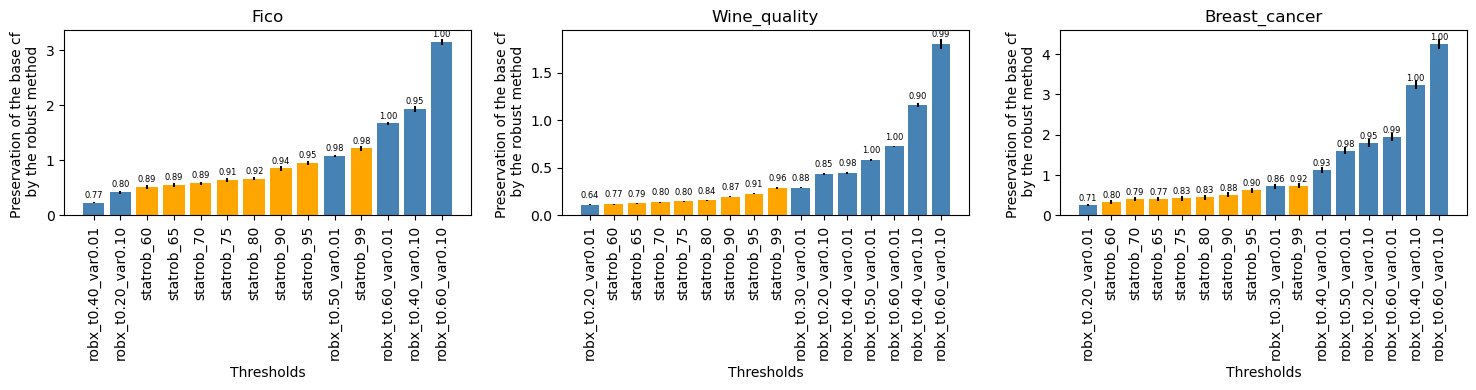

Plotting with base method dice and saving to results_big_benchmark_march6/plots/preservation/preservation_dice_SameSampleExperimentData.png
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']


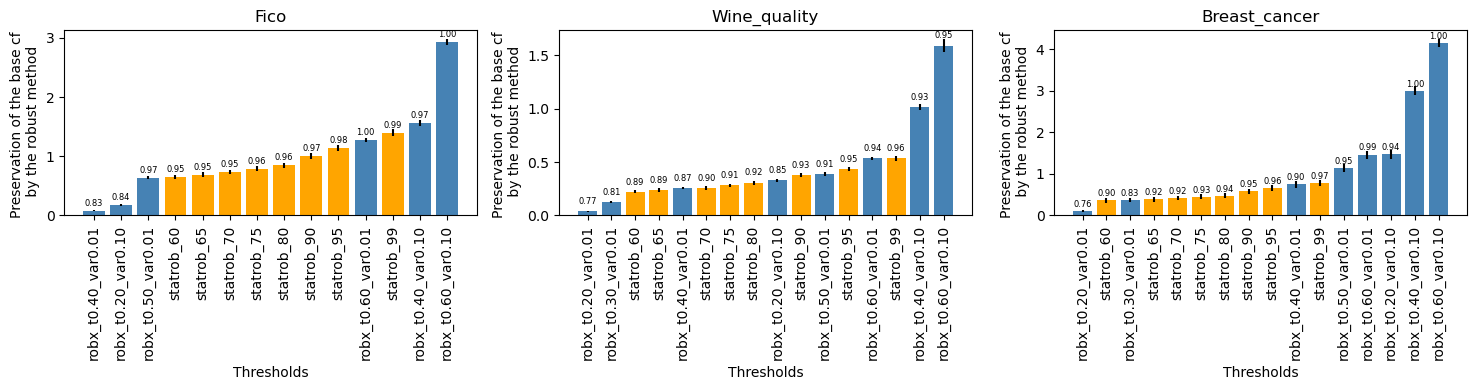

======================================== Experiment type: TwoSamplesOneDatasetExperimentData ========================================
Plotting with base method gs and saving to results_big_benchmark_march6/plots/preservation/preservation_gs_TwoSamplesOneDatasetExperimentData.png
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']


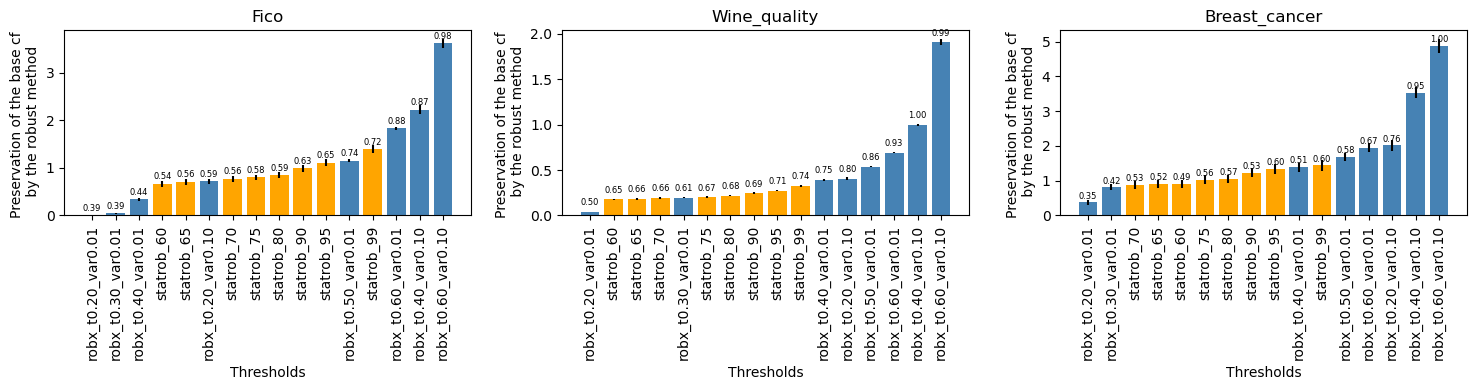

Plotting with base method dice and saving to results_big_benchmark_march6/plots/preservation/preservation_dice_TwoSamplesOneDatasetExperimentData.png
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']


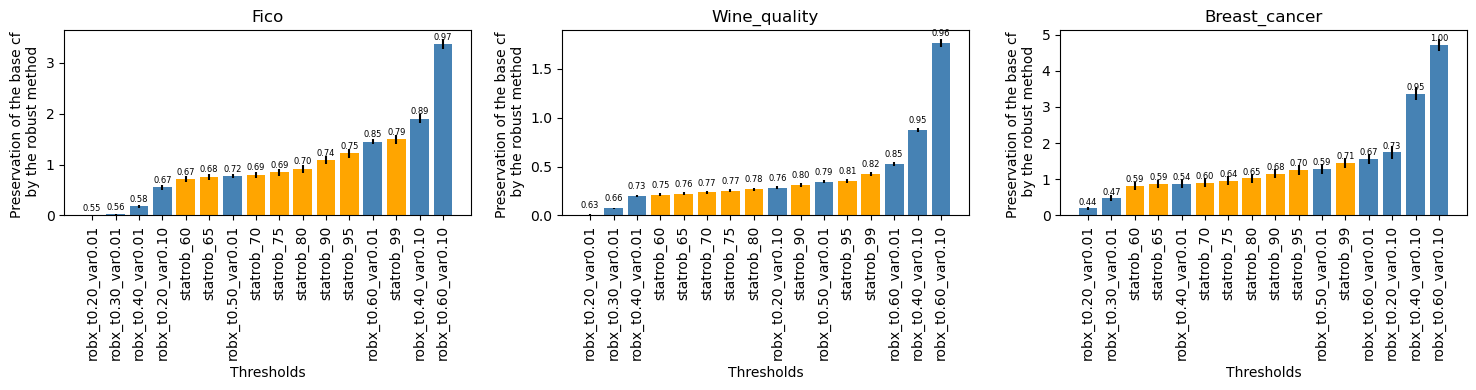

Done!


In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def plot_preservation(datasets: list = ['fico', 'wine_quality', 'breast_cancer'], 
                      base_method: str = 'gs',
                      experiment: str = 'SameSampleExperimentData',
                      ensemble: str = 'mlp-torch',
                      threshs: list[int] = THRESHS,
                      CI_level: float = 0.95,
                      save_filename: str = None
                     ) -> None:
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    
    select_threshs = [0, 1, 2, 3, 4, 5, 6, 7]
    __threshs = [threshs[i] for i in select_threshs]
    
    taus = [.2, .3, .4, .5, .6, .2, .4, .6]
    vars = [.01, .01, .01, .01, .01, .1, .1, .1]
    robx_cols = [f'robx_t{t:.2f}_var{v:.2f}' for t, v in zip(taus, vars)]

    for dataset, ax in zip(datasets, axs):
        
        meas = {'robx': [], 'statrob': []}
        vals = {'robx': [], 'statrob': []}
        
        for robust_method in ['statrob', 'robx']:
            results = read_results(dataset, robust_method, experiment, base_method, ensemble)
        
            measurements = []
            validity = []
        
            for exres in results.values():
                res = exres.get_results_as_pandas()
                res = res.dropna()
                measurements.append(res['robust_cf_to_base_cf_proximity_L1'].to_numpy())
                validity.append(res['robust_validity_2'].to_numpy())
                
            z_stat = np.abs(stats.norm.ppf((1-CI_level)/2))

            # Robust
            means = np.array([np.mean(m) for m in measurements])
            stds = np.array([np.std(m) for m in measurements])
            Ci_99 = np.array([z_stat * s / np.sqrt(len(m)) for m, s in zip(measurements, stds)])
            meas[robust_method] = [means, Ci_99, robx_cols if robust_method == 'robx' else [f'statrob_{th}' for th in __threshs]]
 
            # Validity
            vals[robust_method] =  np.array([np.mean(m) for m in validity])
            
            
        # Now, let's create a barplot of the preservation of proximity to the base cf
        all_means = np.concatenate((meas['robx'][0], meas['statrob'][0]))
        all_errors = np.concatenate((meas['robx'][1], meas['statrob'][1]))
        all_labels = meas['robx'][2] + meas['statrob'][2]

        # Remove indices where mean is 0
        mask = all_means != 0
        all_means = all_means[mask]
        all_errors = all_errors[mask]
        all_labels = np.array(all_labels)[mask]
        
        sorted_indices = np.argsort(all_means)
        
        
        x = np.arange(len(all_means))  # the label locations
        
        # create colors for the bars, based on the method
        colors = ['steelblue' if 'robx' in label else 'orange' for label in all_labels[sorted_indices]]
        
        ax.bar(x, all_means[sorted_indices], yerr=all_errors[sorted_indices], color=colors)
        
        # Add validity as a number over the bars
        all_vals = np.concatenate((vals['robx'], vals['statrob']))[mask]

        for i, (m, v) in enumerate(zip(all_means[sorted_indices], all_vals[sorted_indices])):
            ax.text(i, m + 0.05, f'{v:.2f}', ha='center', va='bottom', fontsize=6)

        
        
        ax.set_xticks(x)
        ax.set_xticklabels(all_labels[sorted_indices], rotation=90)
        ax.set_xlabel('Thresholds')
        ax.set_ylabel('Preservation of the base cf \n by the robust method')
        ax.set_title(f'{dataset.capitalize()}')
        
    # Add legend for the colors
    # plt.legend(['RobX', 'StatRob'] if 'robx' in all_labels[0] else ['StatRob', 'RobX'], loc='upper left')


    plt.tight_layout()
    
    if save_filename:
        os.makedirs(os.path.dirname(save_filename), exist_ok=True)
        plt.savefig(save_filename, dpi=300, bbox_inches='tight')
    
    plt.show()
    

# Assuming you have read_results() implemented properly

SAVE_DIR = 'results_big_benchmark_march6/plots/preservation'
print('Saving to', SAVE_DIR)
print('Starting to plot...')
for experiment_type in ['SameSampleExperimentData', 'TwoSamplesOneDatasetExperimentData']:
    print('='*40 + f' Experiment type: {experiment_type} ' + '='*40)
    for base_method in ['gs', 'dice']:
        save_filepath = f'{SAVE_DIR}/preservation_{base_method}_{experiment_type}.png'
        print(f'Plotting with base method {base_method} and saving to {save_filepath}')
        plot_preservation(base_method=base_method, experiment=experiment_type, save_filename=save_filepath)
  
print('Done!')


Saving to results_big_benchmark_march6/plots/scatter_prox_val
Starting to plot...
======================================== Experiment type: SameSampleExperimentData ========================================
Plotting with base method gs and saving to results_big_benchmark_march6/plots/scatter_prox_val/scatter_prox_val_gs_SameSampleExperimentData.png
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']


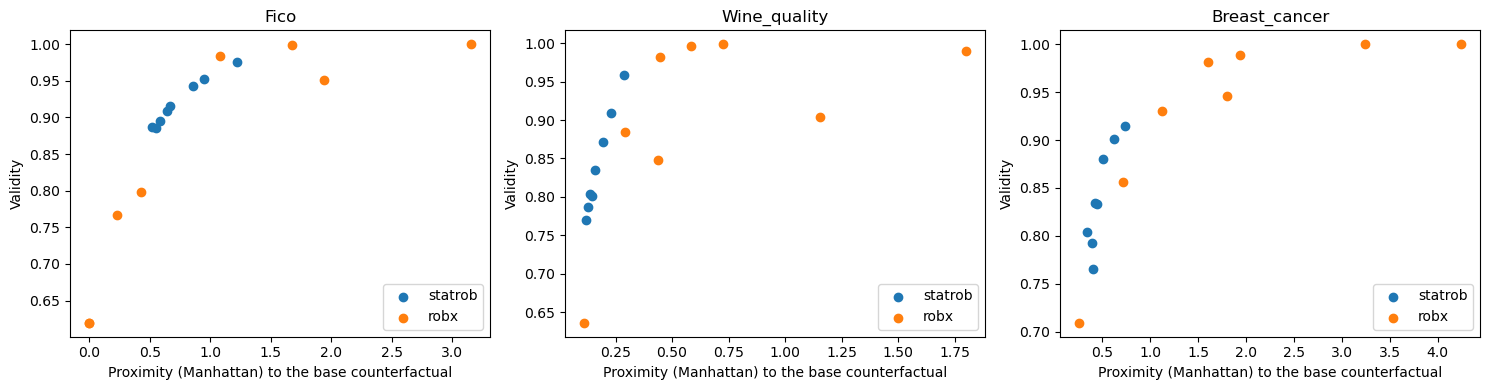

Plotting with base method dice and saving to results_big_benchmark_march6/plots/scatter_prox_val/scatter_prox_val_dice_SameSampleExperimentData.png
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']


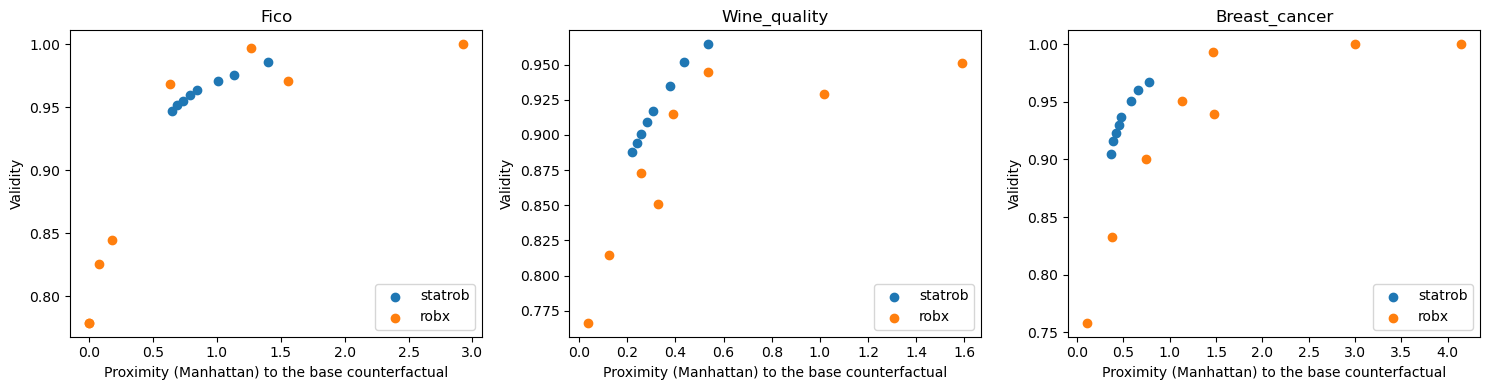

======================================== Experiment type: TwoSamplesOneDatasetExperimentData ========================================
Plotting with base method gs and saving to results_big_benchmark_march6/plots/scatter_prox_val/scatter_prox_val_gs_TwoSamplesOneDatasetExperimentData.png
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']


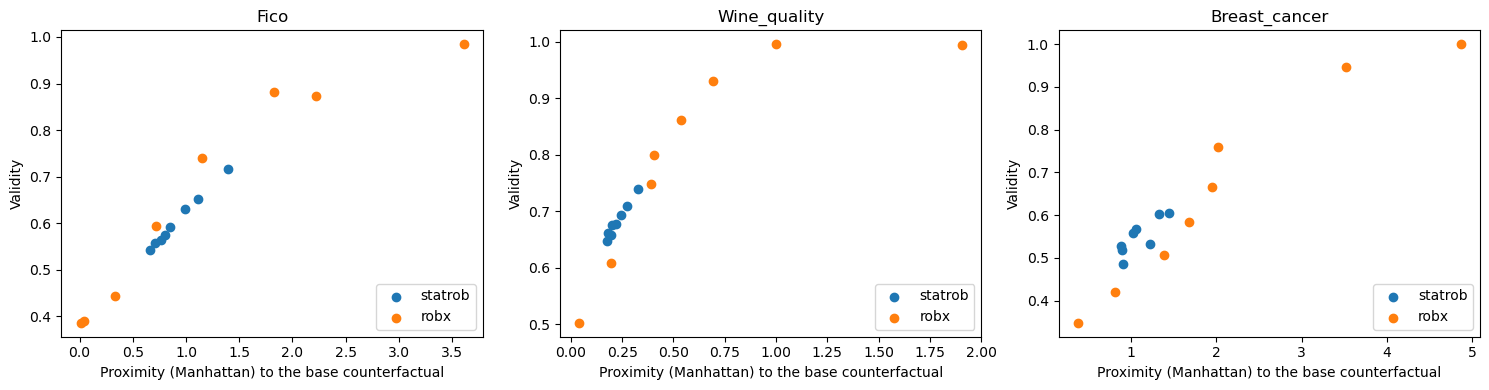

Plotting with base method dice and saving to results_big_benchmark_march6/plots/scatter_prox_val/scatter_prox_val_dice_TwoSamplesOneDatasetExperimentData.png
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']
Combined (thresh:how many): ['60:5', '65:5', '70:5', '75:5', '80:5', '90:5', '95:5', '99:5']


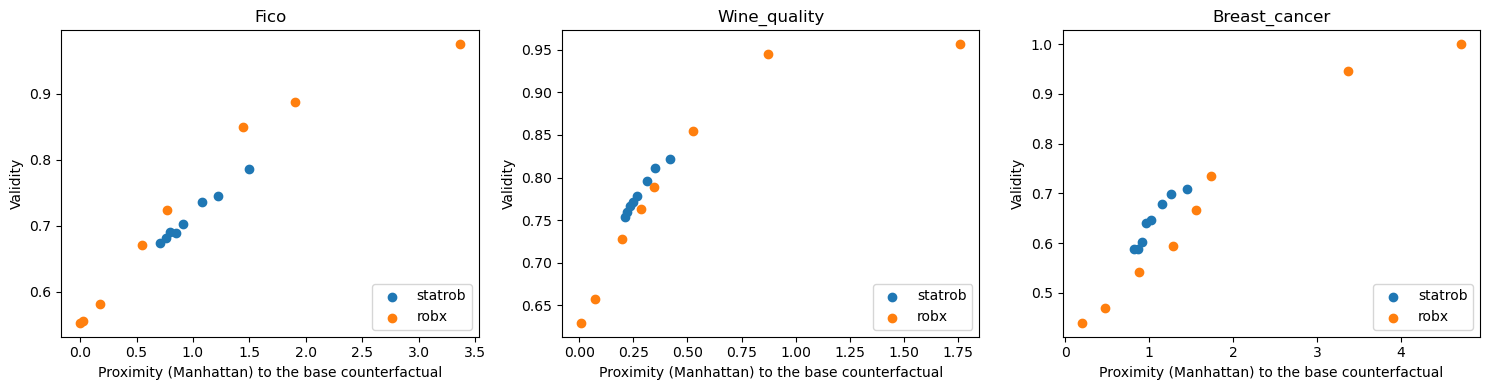

Done!


In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def scatter_prox_val(datasets: list = ['fico', 'wine_quality', 'breast_cancer'], 
                      base_method: str = 'gs',
                      experiment: str = 'SameSampleExperimentData',
                      ensemble: str = 'mlp-torch',
                      save_filename: str = None
                     ) -> None:
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))


    for dataset, ax in zip(datasets, axs):
        
        meas = {'robx': [], 'statrob': []}
        vals = {'robx': [], 'statrob': []}
        
        for robust_method in ['statrob', 'robx']:
            results = read_results(dataset, robust_method, experiment, base_method, ensemble)
        
            measurements = []
            validity = []
        
            for exres in results.values():
                res = exres.get_results_as_pandas()
                res = res.dropna()
                measurements.append(res['robust_cf_to_base_cf_proximity_L1'].to_numpy())
                validity.append(res['robust_validity_2'].to_numpy())      
       
            meas[robust_method] = np.array([np.mean(m) for m in measurements])
            vals[robust_method] =  np.array([np.mean(m) for m in validity])
            
        # Screate scatterplot of the proximity vs validity
        for robust_method in ['statrob', 'robx']:
            ax.scatter(meas[robust_method], vals[robust_method], label=robust_method)
        
        ax.set_xlabel('Proximity (Manhattan) to the base counterfactual')
        ax.set_ylabel('Validity')
        ax.set_title(f'{dataset.capitalize()}')
        ax.legend(loc='lower right')
 

    plt.tight_layout()
    
    if save_filename:
        os.makedirs(os.path.dirname(save_filename), exist_ok=True)
        plt.savefig(save_filename, dpi=300, bbox_inches='tight')
    
    plt.show()
    

# Assuming you have read_results() implemented properly

SAVE_DIR = 'results_big_benchmark_march6/plots/scatter_prox_val'
print('Saving to', SAVE_DIR)
print('Starting to plot...')
for experiment_type in ['SameSampleExperimentData', 'TwoSamplesOneDatasetExperimentData']:
    print('='*40 + f' Experiment type: {experiment_type} ' + '='*40)
    for base_method in ['gs', 'dice']:
        save_filepath = f'{SAVE_DIR}/scatter_prox_val_{base_method}_{experiment_type}.png'
        print(f'Plotting with base method {base_method} and saving to {save_filepath}')
        scatter_prox_val(base_method=base_method, experiment=experiment_type, save_filename=save_filepath)
  
print('Done!')


<div style="background-color: #880000; color: #FFFFFF; font-weight: bold; padding: 10px; margin: 10px 0 20px 0; text-align: center; border-radius: 10px;">Counterfactual stability</div>

<div style="background-color: #880000; color: #FFFFFF; font-weight: bold; padding: 10px; margin: 10px 0 20px 0; text-align: center; border-radius: 10px;">Old stuff</div>

In [15]:
method = ROBUST_METHOD

def plot_robustness(df, df_stdev, method, folder, name):
    fig, ax = plt.subplots(figsize=(10,6))
    sns.scatterplot(data=df, x='alpha-Rob', y=f'validity_{method}_2', s=100, legend=False, label=f'GS + {method}')
    #Add error bars
    plt.errorbar(df['alpha-Rob'], df[f'validity_{method}_2'], yerr=df_stdev[f'validity_{method}_2'], 
                 fmt='o', color='blue', capsize=5, alpha=0.5, label=f'GS + {method} 99% CI')

    sns.scatterplot(data=df, x='alpha-Rob', y=f'validity_orig_2', s=100, legend=False, label='GS')
    plt.errorbar(df['alpha-Rob'], df[f'validity_orig_2'], yerr=df_stdev[f'validity_orig_2'],
                    fmt='o', color='orange', capsize=5, alpha=0.5, label='GS 99% CI')


    # plt.title(f'Dataset: {DATASET} - {method} Robustness vs Empirical Validity on Changed Model')
    title = f'''Empirical Validity of {method} and its alpha confidence thresholds \n 
    Dataset: {DATASET}
    Method: {ROBUST_METHOD}
    Experiment: {EXPERIMENT}
    Ensemble: {ENSEMBLE}
    Base Method: {BASE_METHOD}
    '''
    
    plt.suptitle(title)
    plt.xlabel('alpha-Robustness')
    plt.ylabel('Empirical Validity on Changed Model')
    # Set y-limit to 1
    plt.ylim(0, 1)

    #Plot the numbers next to the points
    for i, row in df.iterrows():
        plt.text(row['alpha-Rob'], row[f'validity_{method}_2'] - 0.02, f'{row[f"validity_{method}_2"]:.2f}', ha='left', va='top', color='blue')
        plt.text(row['alpha-Rob'], row[f'validity_orig_2'], f'{row[f"validity_orig_2"]:.2f}', ha='right', va='bottom', color='orange')


    # Move the legend outside the figure
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Method')
    plt.tight_layout()
    
    save_path = f'{folder}/images'
    os.makedirs(save_path, exist_ok=True)
    plt.savefig(f'{save_path}/{name}_val_rob_corr.png')

    plt.show()

plot_robustness(df, df_stdev, method, folder, name)

NameError: name 'df' is not defined

In [ ]:
table = df.drop('alpha-Rob', axis=1).iloc[3].to_frame().round(3)
# table.index = ['original_1', 'original_2', 'statrob_1', 'statrob_2']
table.columns = ['Validity']
table['StdDev'] = df_stdev.iloc[3].to_numpy().round(3)
table['model'] = ['original', 'changed', 'original', 'changed']
table['Method'] = ['GrowingSpheres', 'GrowingSpheres', 'GrowingSpheres + Statrobxplus(0.9-Rob)', 'GrowingSpheres + Statrobxplus(0.9-Rob)']



# Plotting the bar plot
sns.catplot(
    data=table, kind="bar",
    y="Validity", x="Method", hue="model",
    palette="dark", alpha=.6, height=6, legend=True, legend_out=False, aspect=2
)

# Adding error bars based on StdDev
for i, (validity, std_dev) in enumerate(zip(table['Validity'], table['StdDev'])):
    if i % 2 == 1:
        plt.errorbar(i / 2 - 0.3 , validity, yerr=std_dev, fmt='none', ecolor='black', capsize=5, alpha=0.3)

# Adding numbers on top of bars
ax = plt.gca()
for cont in ax.containers[:2]:
    for bar in cont:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Adjusting legend position
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Model')

plt.title('Validity of counterfactuals on the original and changed model. \nExperiment: Same data, same model with different seed')
plt.tight_layout()
plt.savefig(f'{folder}/{name}_barplot.png')
plt.show()


print(table)

ValueError: Length of values (5) does not match length of index (4)

In [ ]:
name = 'torch-fico-robx-var01-config0'

robs = []
robs_std = []
notna_count = []

threshs = np.array([6,7,8,9])
for i, a in enumerate(threshs):
    f = f'{folder}/{name}{a}_0.joblib'
    print(f)
    er = ExperimentResults.load_results_from_file(f)
    res = er.get_results_as_pandas()
    # res = res.dropna() #TODO investigate what causes nulls 
    # res = res[res['robust_validity'] > 0] #TODO fix so robust cf is always valid for model 1
    cols = [x for x in res.columns if 'validity' in x]
    means = res[cols].mean().to_numpy()
    stds = res[cols].std().to_numpy()
    robs.append(means)
    robs_std.append(stds)
    
    notna_count.append(res[cols].notna().sum().to_numpy())

df_stdev = pd.DataFrame(robs_std, columns=cols)
print('stddevs:', df_stdev.round(3))
df = pd.DataFrame(robs, columns=cols).round(3)
df.columns = ['validity_orig_1', 'validity_orig_2', 'validity_statrob_1', 'validity_statrob_2']
df['alpha-Rob'] = threshs / 10
df

In [ ]:
table = df.drop('alpha-Rob', axis=1).iloc[3].to_frame().round(3)
# table.index = ['original_1', 'original_2', 'statrob_1', 'statrob_2']
table.columns = ['Validity']
table['StdDev'] = df_stdev.iloc[3].to_numpy().round(3)
table['model'] = ['original', 'changed', 'original', 'changed']
table['Method'] = ['GrowingSpheres', 'GrowingSpheres', 'GrowingSpheres + RobX(tau=0.6,std=0.1)', 'GrowingSpheres + RobX(tau=0.6,std=0.1)']



# Plotting the bar plot
sns.catplot(
    data=table, kind="bar",
    y="Validity", x="Method", hue="model",
    palette="dark", alpha=.6, height=6, legend=True, legend_out=False, aspect=2
)

# Adding error bars based on StdDev
for i, (validity, std_dev) in enumerate(zip(table['Validity'], table['StdDev'])):
    if i % 2 == 1:
        plt.errorbar(i / 2 - 0.3 , validity, yerr=std_dev, fmt='none', ecolor='black', capsize=5, alpha=0.3)

# Adding numbers on top of bars
ax = plt.gca()
for cont in ax.containers[:2]:
    for bar in cont:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Adjusting legend position
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Model')

plt.title('Validity of counterfactuals on the original and changed model. \nExperiment: Same data, same model with different seed')
plt.tight_layout()
plt.savefig(f'{folder}/{name}_barplot.png')
plt.show()


print(table)

In [ ]:
notna_df = pd.DataFrame(notna_count, columns=cols)
notna_df.index = ['tau=0.6', 'tau=0.7', 'tau=0.8', 'tau=0.9']
notna_df.columns = ['validity_base_original', 'validity_base_changed', 'validity_robx_original', 'validity_robx_changed']
print('How many instances were correctly returned by the explainer? For how many instances was RobX able to find a valid CF?')
notna_df